In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

In [ ]:
'''
輸入資料
'''
import os
import pandas as pd
from scipy.io import arff

data = '/content/german.data'
print(data)

columns_name = ['ExistingCheckingAccount', 'Duration_month', 'CreditHistory', 'Purpose', 'CreditAmount',
         'SavingsAccount', 'EmploymentSince', 'InstallmentRate_DisposableIncome', 'StatusAndSex', 'OtherDebtors',
         'ResidenceSince', 'Property', 'Age_year', 'OtherInstallmentPlans', 'Housing',
         'ExistingCredits', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker', 'Classification']

dataset = pd.read_csv(data, names=columns_name, delimiter=' ')
print(dataset)

'''
分類欄位名稱
'''
numAttribute = ['ExistingCheckingAccount', 'CreditHistory', 'Purpose', 'SavingsAccount', 'EmploymentSince',
           'StatusAndSex', 'OtherDebtors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job',
           'Telephone', 'ForeignWorker']
qualiAttribute = ['CreditAmount', 'Duration_month', 'InstallmentRate_DisposableIncome', 'ResidenceSince', 'Age_year',
           'ExistingCredits', 'PeopleLiable', 'Classification']

'''
欄位前處理
'''

for j in range(len(qualiAttribute)):
    dataset[qualiAttribute[j]] = pd.to_numeric(dataset[qualiAttribute[j]])
print(dataset.head())

'''
Label encoding編碼
'''
from sklearn.preprocessing import LabelEncoder

dataset_origin = dataset
print(dataset_origin.head())

labelencoder = LabelEncoder()
for i in range(len(numAttribute)):
    print('before: ', numAttribute[i],": ", dataset_origin[numAttribute[i]].unique())
    dataset[numAttribute[i]] = labelencoder.fit_transform(dataset[numAttribute[i]])
    print('afer: ', numAttribute[i],": ", dataset[numAttribute[i]].unique())
print(dataset.head())

dataset.Classification.replace([1,2], [1,0], inplace=True)
print(dataset.info())

dataset.to_csv('/content/german.csv', index=False)

/content/german.data
    ExistingCheckingAccount  Duration_month CreditHistory Purpose  \
0                       A11               6           A34     A43   
1                       A12              48           A32     A43   
2                       A14              12           A34     A46   
3                       A11              42           A32     A42   
4                       A11              24           A33     A40   
..                      ...             ...           ...     ...   
995                     A14              12           A32     A42   
996                     A11              30           A32     A41   
997                     A14              12           A32     A43   
998                     A11              45           A32     A43   
999                     A12              45           A34     A41   

     CreditAmount SavingsAccount EmploymentSince  \
0            1169            A65             A75   
1            5951            A61             A

In [ ]:
dataset.describe()

ExistingCheckingAccount  Duration_month  CreditHistory      Purpose  \
count              1000.000000     1000.000000     1000.00000  1000.000000   
mean                  1.577000       20.903000        2.54500     3.277000   
std                   1.257638       12.058814        1.08312     2.739302   
min                   0.000000        4.000000        0.00000     0.000000   
25%                   0.000000       12.000000        2.00000     1.000000   
50%                   1.000000       18.000000        2.00000     3.000000   
75%                   3.000000       24.000000        4.00000     4.000000   
max                   3.000000       72.000000        4.00000     9.000000   

       CreditAmount  SavingsAccount  EmploymentSince  \
count   1000.000000     1000.000000      1000.000000   
mean    3271.258000        1.105000         2.384000   
std     2822.736876        1.580023         1.208306   
min      250.000000        0.000000         0.000000   
25%     1365.500000        0.000000         2.000000   
50%     2319.500000        0.000000         2.000000   
75%     3972.250000        2.000000         4.000000   
max    18424.000000        4.000000         4.000000   

       InstallmentRate_DisposableIncome  StatusAndSex  OtherDebtors  ...  \
count                       1000.000000    1000.00000   1000.000000  ...   
mean                           2.973000       1.68200      0.145000  ...   
std                            1.118715       0.70808      0.477706  ...   
min                            1.000000       0.00000      0.000000  ...   
25%                            2.000000       1.00000      0.000000  ...   
50%                            3.000000       2.00000      0.000000  ...   
75%                            4.000000       2.00000      0.000000  ...   
max                            4.000000       3.00000      2.000000  ...   

          Property     Age_year  OtherInstallmentPlans      Housing  \
count  1000.000000  1000.000000            1000.000000  1000.000000   
mean      1.358000    35.546000               1.675000     0.929000   
std       1.050209    11.375469               0.705601     0.531264   
min       0.000000    19.000000               0.000000     0.000000   
25%       0.000000    27.000000               2.000000     1.000000   
50%       1.000000    33.000000               2.000000     1.000000   
75%       2.000000    42.000000               2.000000     1.000000   
max       3.000000    75.000000               2.000000     2.000000   

       ExistingCredits          Job  PeopleLiable    Telephone  ForeignWorker  \
count      1000.000000  1000.000000   1000.000000  1000.000000    1000.000000   
mean          1.407000     1.904000      1.155000     0.404000       0.037000   
std           0.577654     0.653614      0.362086     0.490943       0.188856   
min           1.000000     0.000000      1.000000     0.000000       0.000000   
25%           1.000000     2.000000      1.000000     0.000000       0.000000   
50%           1.000000     2.000000      1.000000     0.000000       0.000000   
75%           2.000000     2.000000      1.000000     1.000000       0.000000   
max           4.000000     3.000000      2.000000     1.000000       1.000000   

       Classification  
count     1000.000000  
mean         0.700000  
std          0.458487  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 21 columns]

In [ ]:
dataset.isnull().sum()

ExistingCheckingAccount             0
Duration_month                      0
CreditHistory                       0
Purpose                             0
CreditAmount                        0
SavingsAccount                      0
EmploymentSince                     0
InstallmentRate_DisposableIncome    0
StatusAndSex                        0
OtherDebtors                        0
ResidenceSince                      0
Property                            0
Age_year                            0
OtherInstallmentPlans               0
Housing                             0
ExistingCredits                     0
Job                                 0
PeopleLiable                        0
Telephone                           0
ForeignWorker                       0
Classification                      0
dtype: int64

In [ ]:
def show_values(axs, orient="v", space=.1):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{}'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{}'.format(int(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

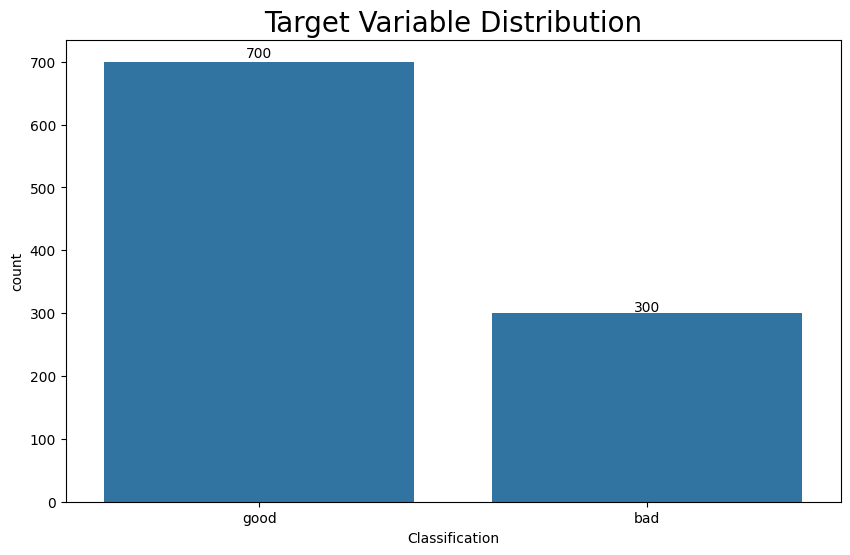

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values
plt.figure(figsize=(10, 6))
p = sns.countplot(data=dataset, x="Classification")
plt.title("Target Variable Distribution", fontsize=20)
show_values(p)
plt.show()

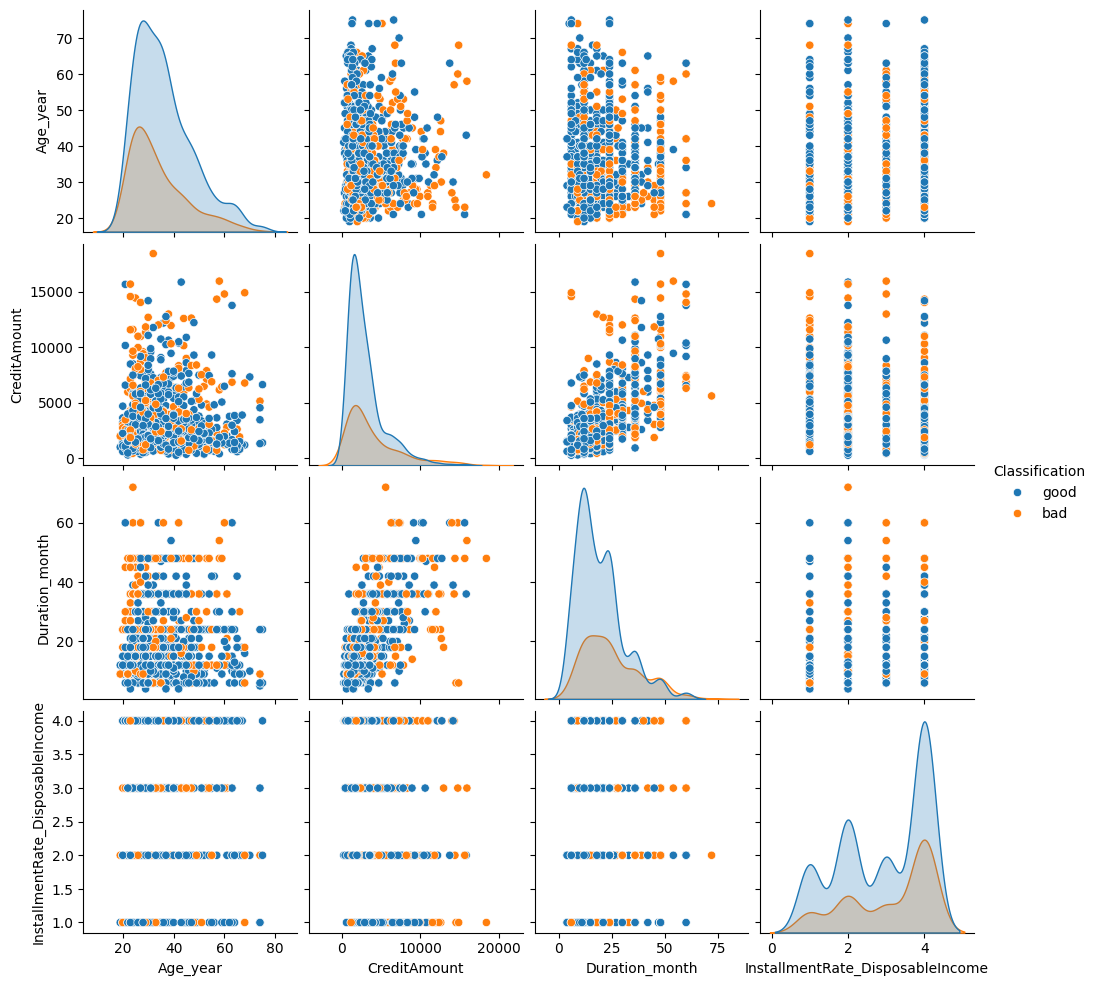

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values
num_cat_risk = ['Age_year', 'CreditAmount', 'Duration_month', 'InstallmentRate_DisposableIncome', 'Classification']
sns.pairplot(dataset[num_cat_risk], hue="Classification")
plt.show()

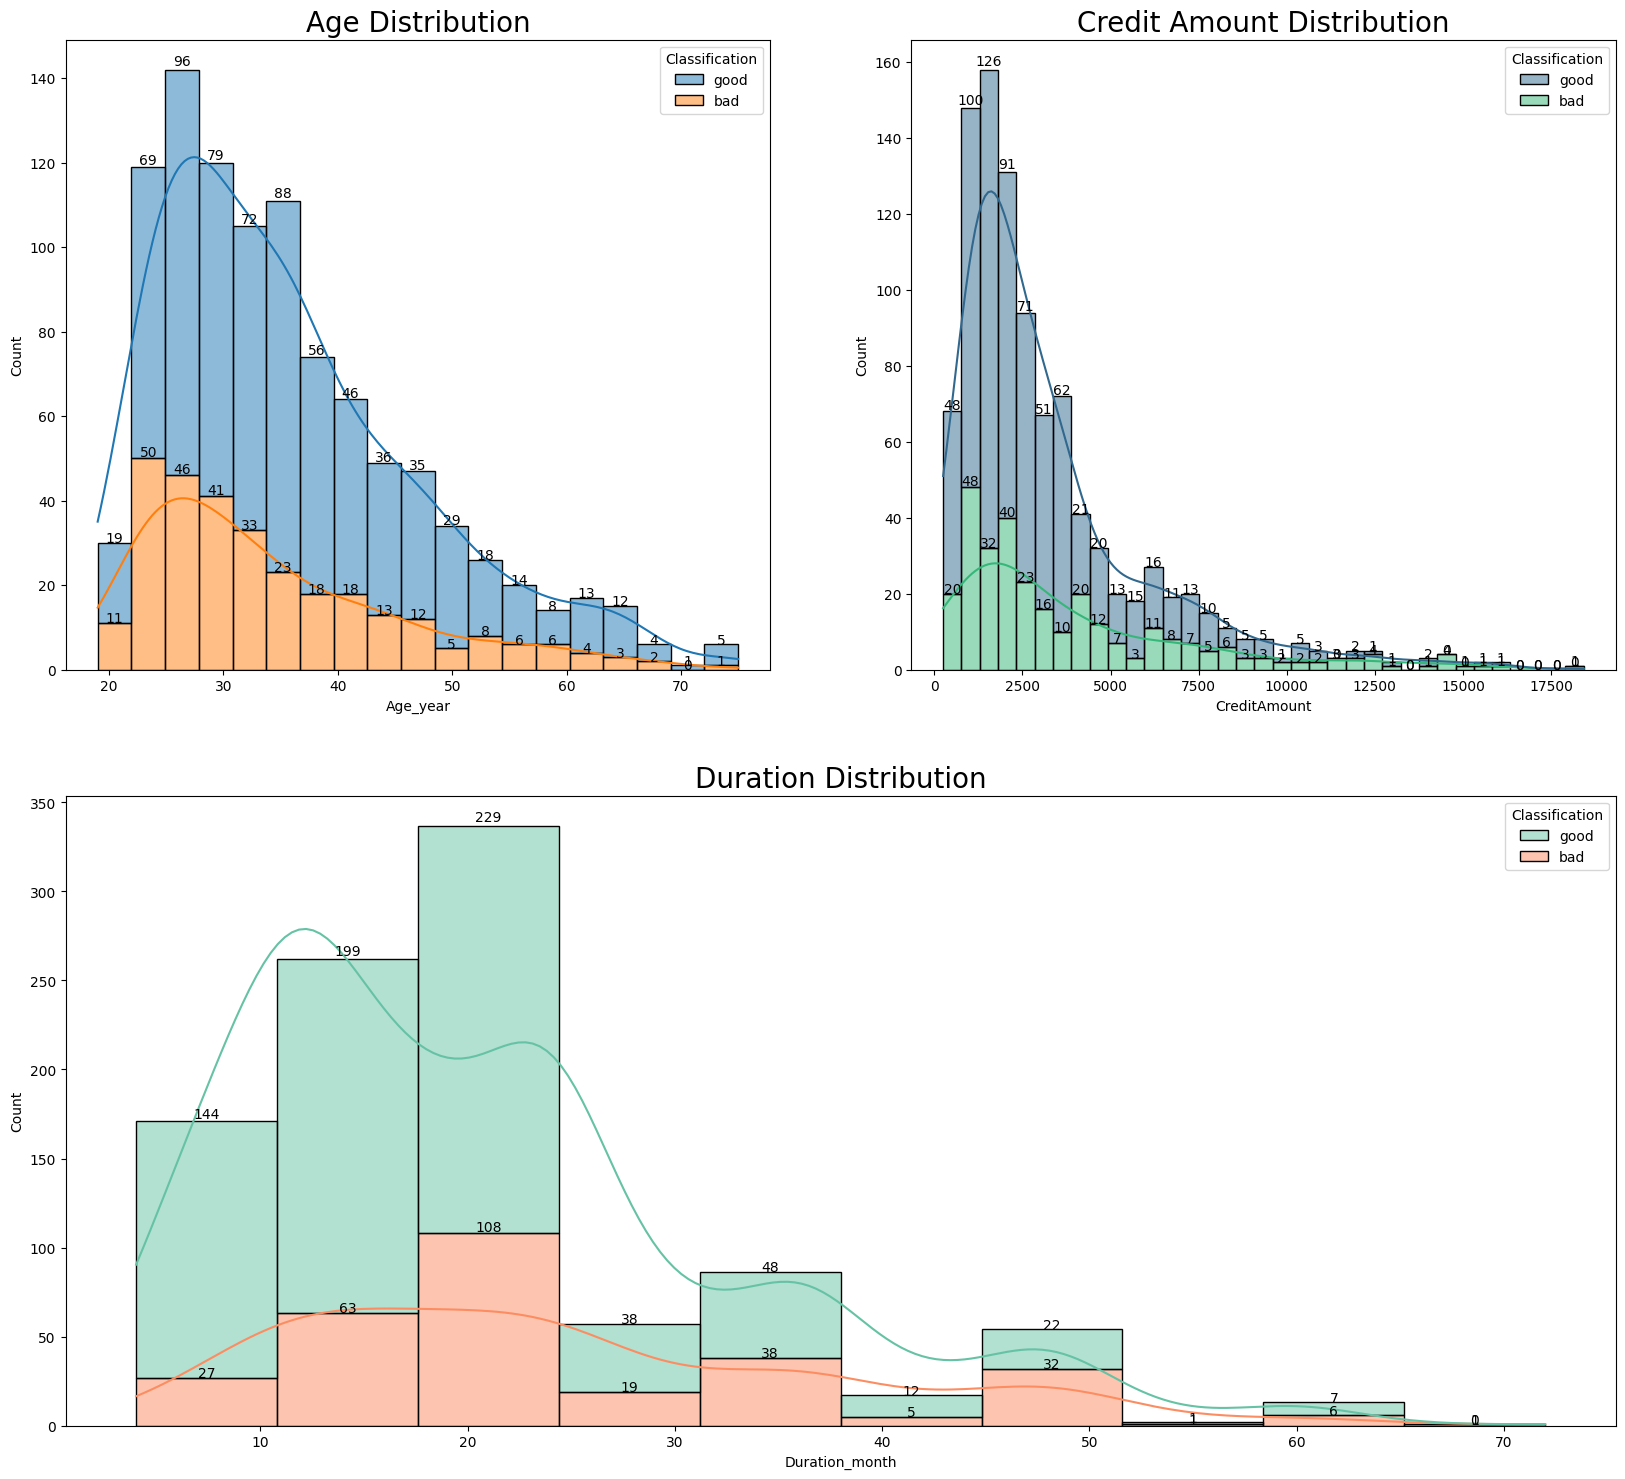

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values

plt.figure(figsize=(20, 18))

plt.subplot(221)
ax1 = sns.histplot(data=dataset, x='Age_year', hue='Classification', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)
show_values(ax1)

plt.subplot(222)
ax2 = sns.histplot(data=dataset, x='CreditAmount', hue='Classification', multiple='stack', palette='viridis', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)
show_values(ax2)

plt.subplot(212)
ax3 = sns.histplot(data=dataset, x='Duration_month', hue='Classification', multiple='stack', palette='Set2', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)
show_values(ax3)
plt.show()

In [ ]:
print("Saving accounts", dataset['SavingsAccount'].unique())

Saving accounts [4 0 2 3 1]


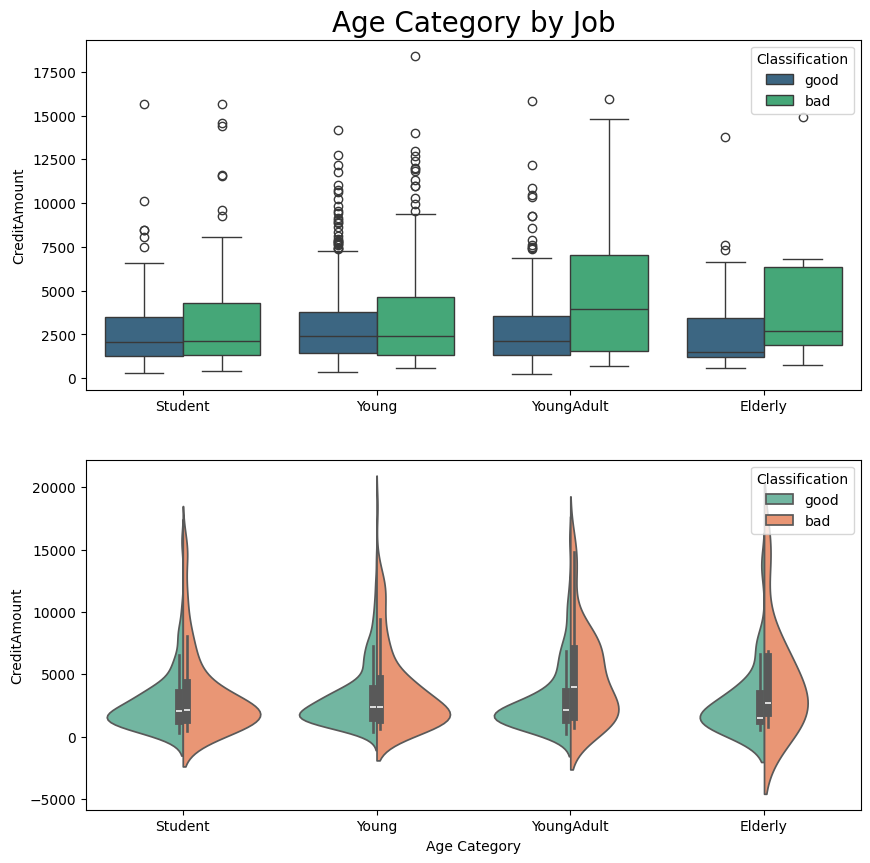

In [ ]:
interval = (18, 25, 40, 60, 120)

cats = ['Student', 'Young', 'YoungAdult', 'Elderly']
dataset["Age Category"] = pd.cut(dataset.Age_year, interval, labels=cats)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title("Credit Amount by Age Category", fontsize=20)
ax1 = sns.boxplot(data=dataset, x='Age Category', y='CreditAmount', palette='viridis', hue='Classification')
ax1.set_title("Age Category by Job", fontsize=20)
ax1.set_xlabel("")

plt.subplot(212)
ax2 = sns.violinplot(data=dataset, x='Age Category', y='CreditAmount', palette='Set2', hue='Classification', split=True)

plt.show()

<ipython-input-25-1c6e8b0eeb83>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
<ipython-input-25-1c6e8b0eeb83>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
<ipython-input-25-1c6e8b0eeb83>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(),rotation=10)
<ipython-input-25-1c6e8b0eeb83>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax3.get_xticklabels(),rotation=10)


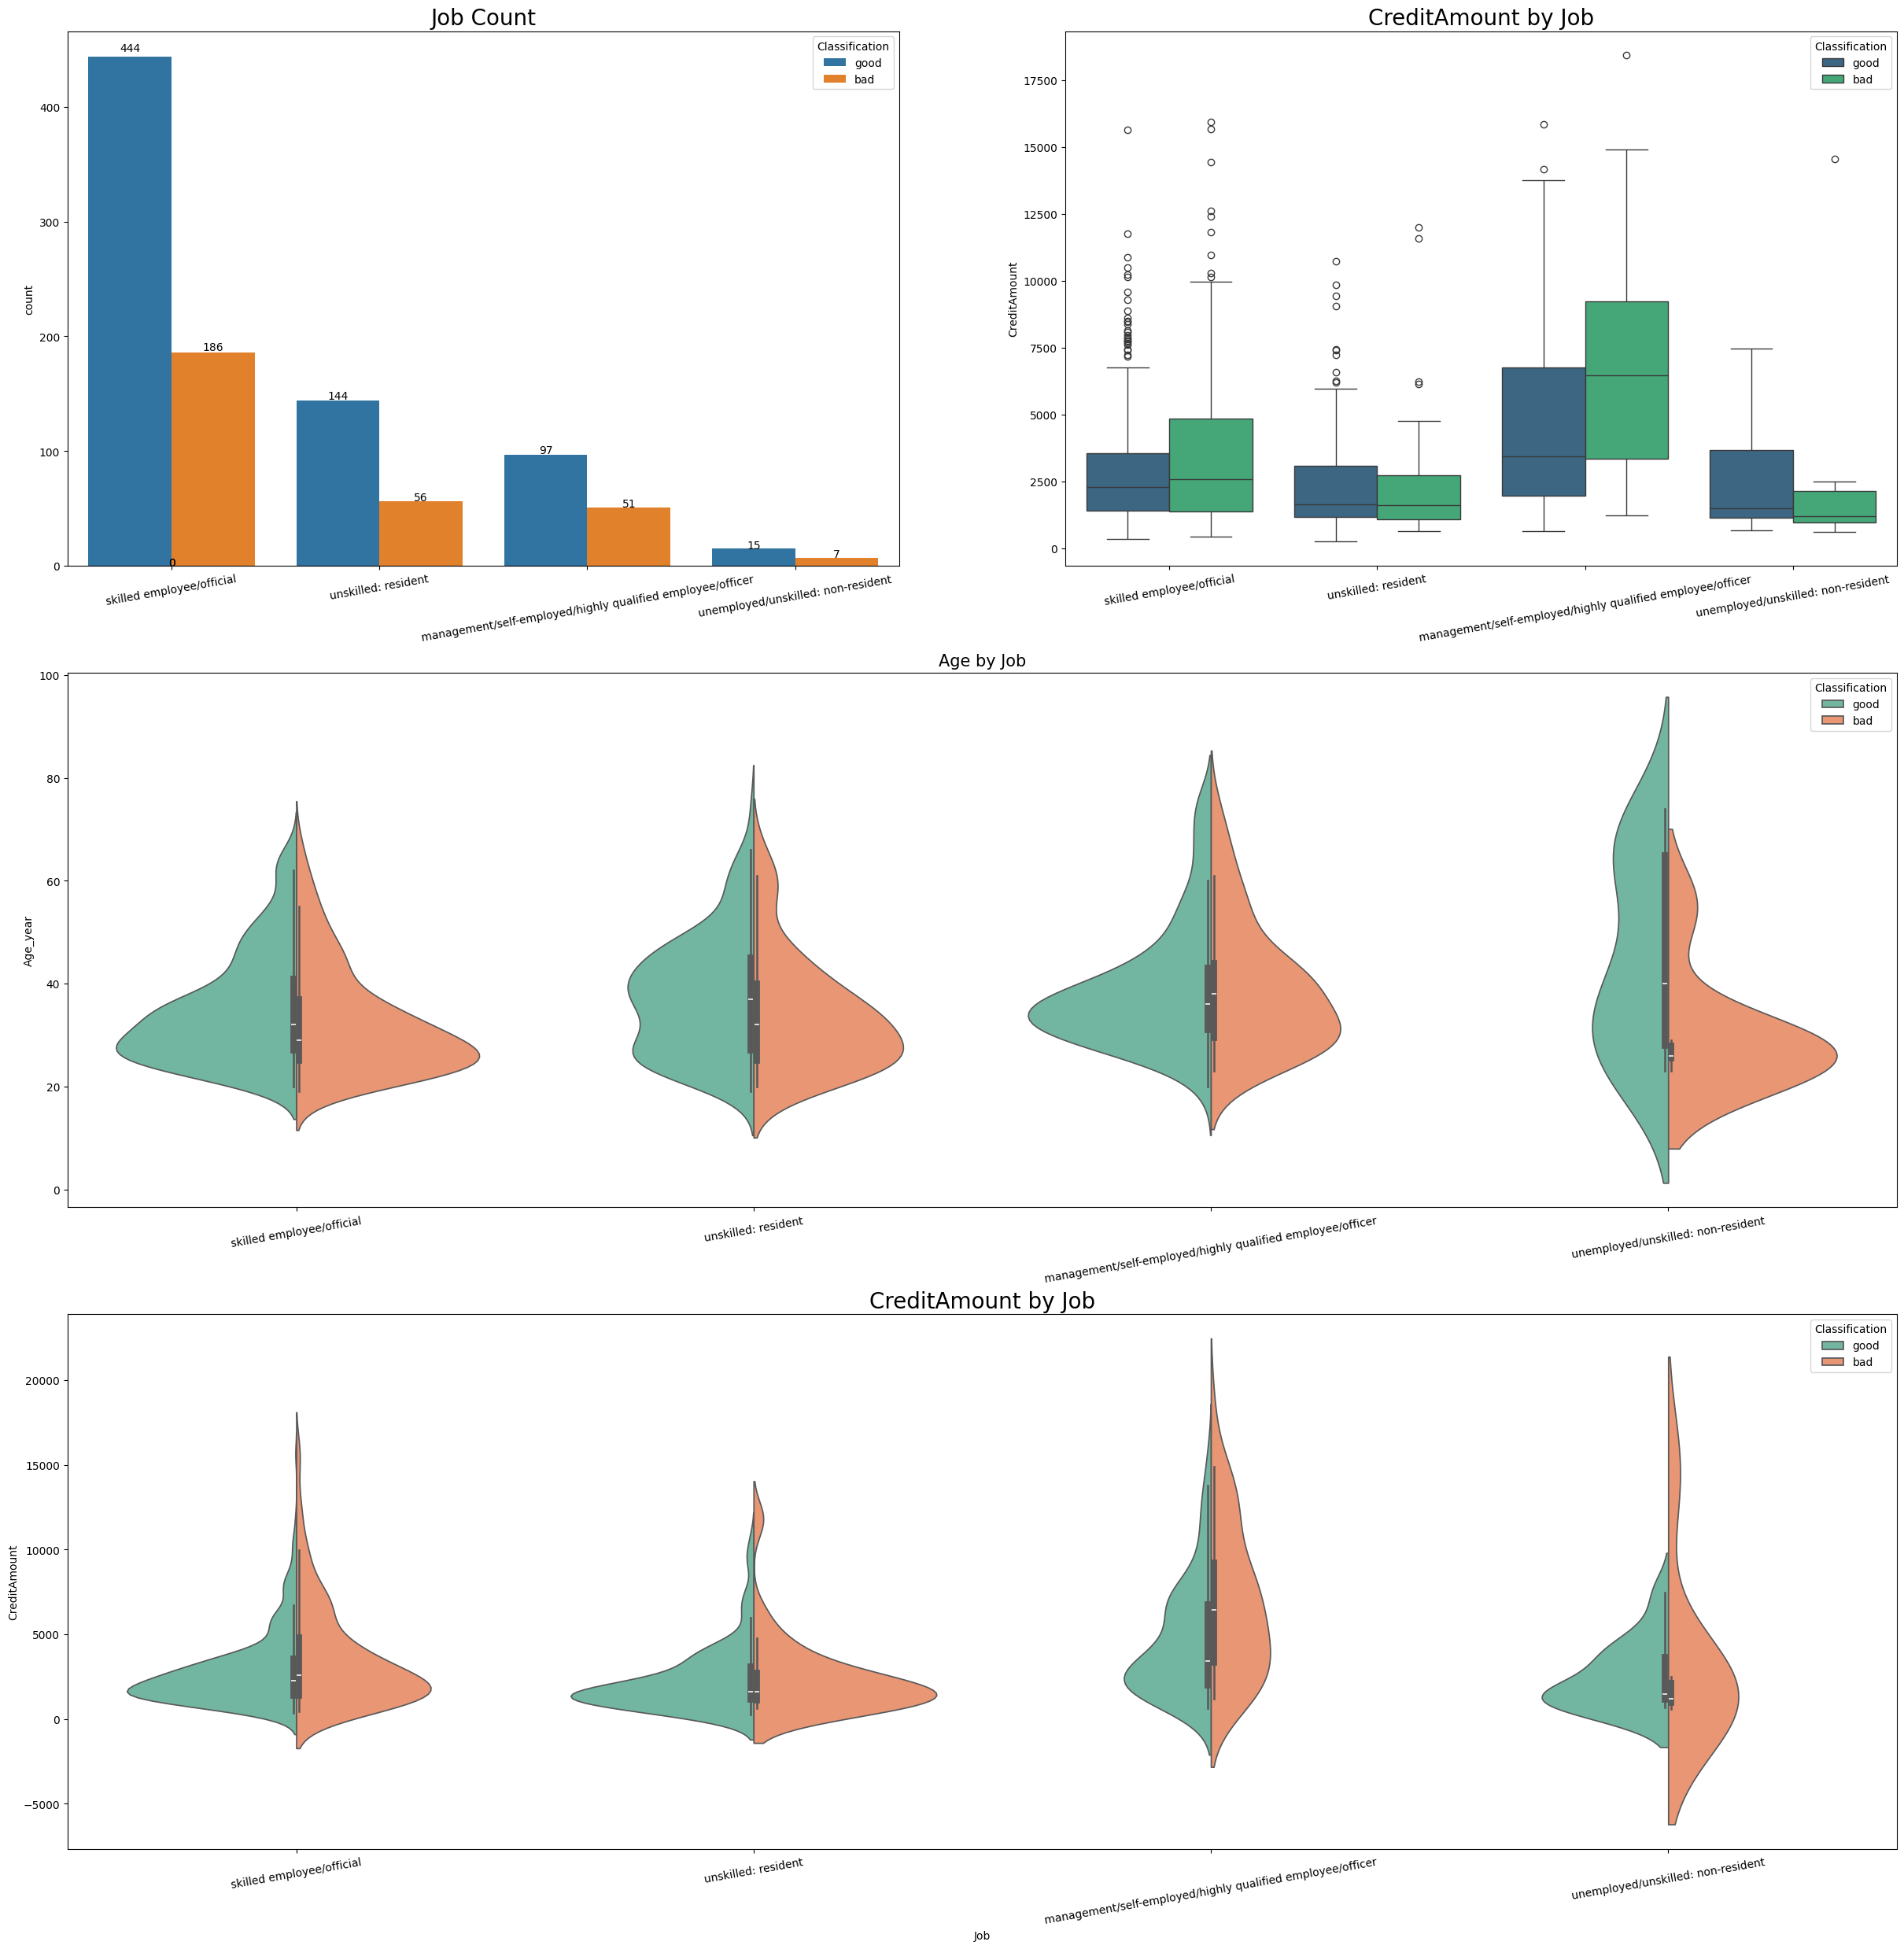

In [ ]:
job_category = ['unemployed/unskilled: non-resident', 'unskilled: resident', 'skilled employee/official', 'management/self-employed/highly qualified employee/officer'] # createing categorial values
dataset['Job'] = dataset['Job'].replace([0, 1, 2, 3], job_category) # replacing numerical with categorical values

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#fig.suptitle("Distribution by Job Category", fontsize=20)
plt.figure(figsize = (30,30))

plt.subplot(321)
ax1 = sns.countplot(data=dataset, x='Job', hue='Classification', palette='tab10')
show_values(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
ax1.set_title("Job Count", fontsize=20)
ax1.set_xlabel("")
ax1.tick_params(labelsize=10)

plt.subplot(322)
ax2 = sns.boxplot(data=dataset, x='Job', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
ax2.set_title("CreditAmount by Job", fontsize=20)
ax2.set_xlabel("")
ax2.tick_params(labelsize=10)

plt.subplot(312)
ax3 = sns.violinplot(data=dataset, x='Job', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=10)
ax3.set_title("Age by Job", fontsize=15)
ax3.set_xlabel("")
ax3.tick_params(labelsize=10)

plt.subplot(313)
ax4 = sns.violinplot(data=dataset, x='Job', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax4.set_xticklabels(ax3.get_xticklabels(),rotation=10)
ax4.set_title("CreditAmount by Job", fontsize=20)
ax4.tick_params(labelsize=10)



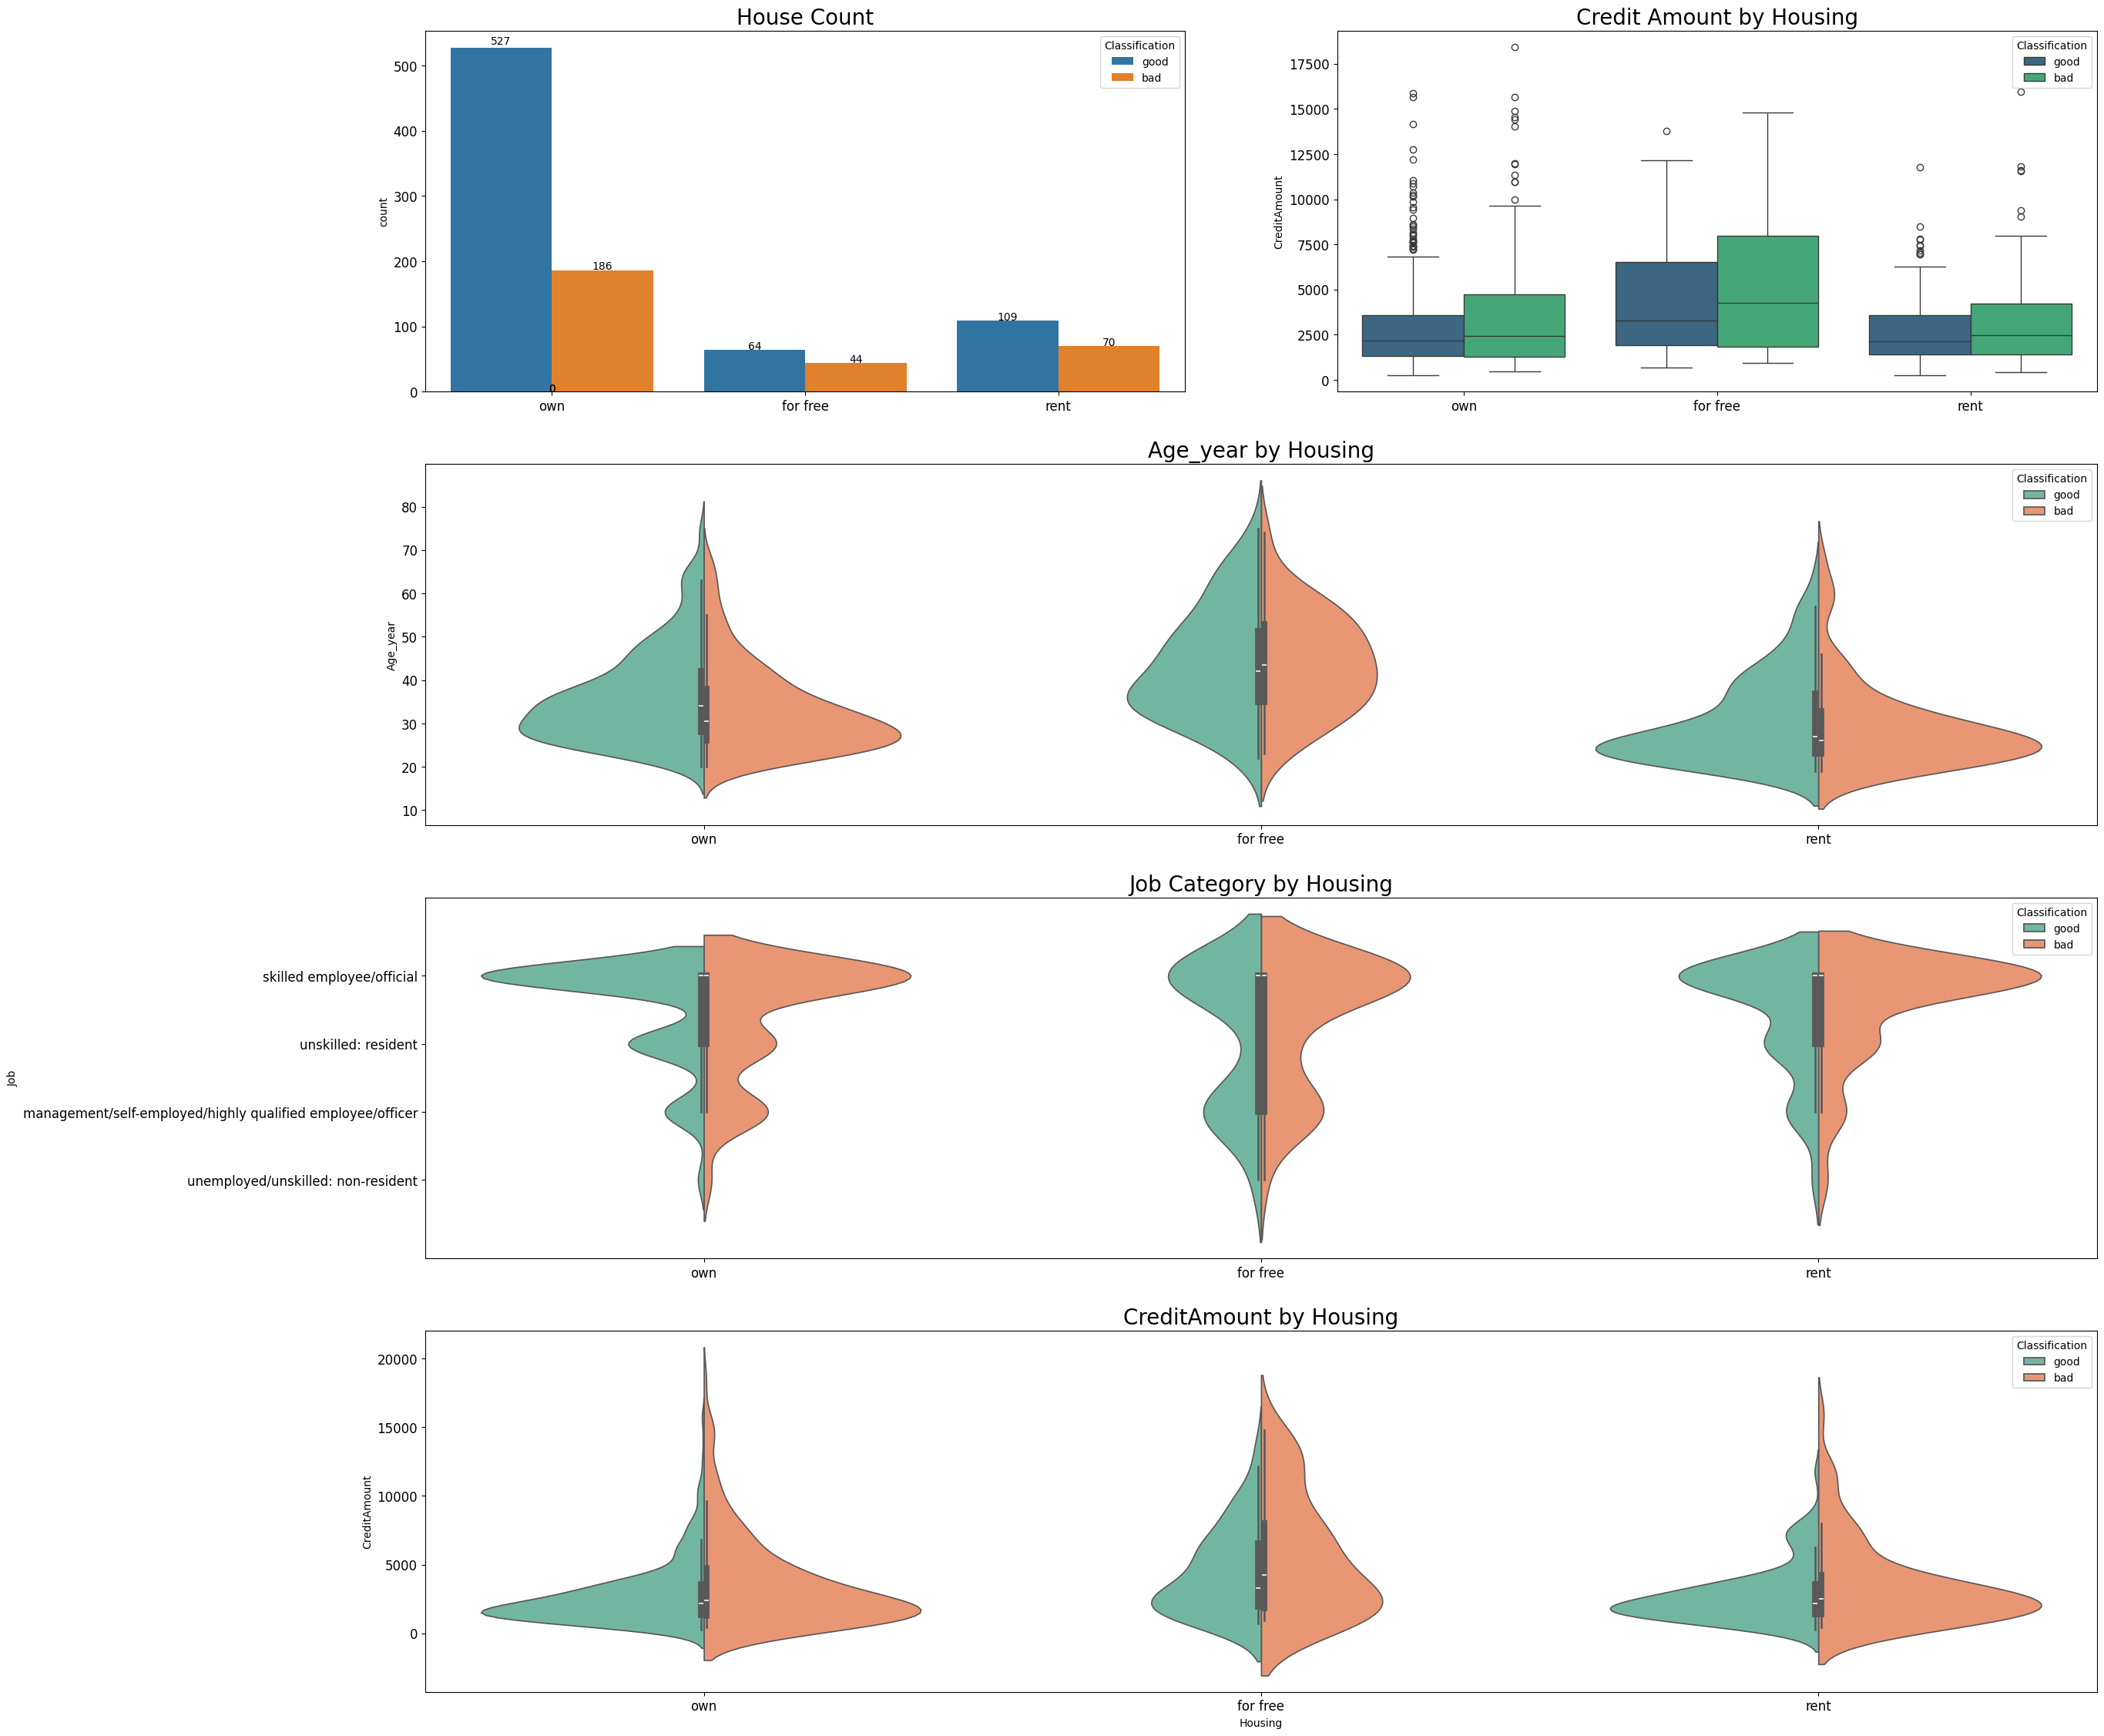

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values

house_category = ['rent','own','for free'] # createing categorial values
dataset['Housing'] = dataset['Housing'].replace([0, 1, 2], house_category) # replacing numerical with categorical values

plt.figure(figsize=(28, 28))

plt.subplot(421)
ax1 = sns.countplot(data=dataset, x='Housing', palette='tab10', hue='Classification')
ax1.set_title("House Count", fontsize=20)
show_values(ax1)
ax1.set_xlabel("")

plt.subplot(422)
ax2 = sns.boxplot(data=dataset, x='Housing', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_title("Credit Amount by Housing", fontsize=20)
ax2.set_xlabel("")

plt.subplot(412)
ax3 = sns.violinplot(data=dataset, x='Housing', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_title("Age_year by Housing", fontsize=20)
ax3.set_xlabel("")

plt.subplot(413)
ax4 = sns.violinplot(data=dataset, x='Housing', y='Job', palette='Set2', hue='Classification', split=True)
ax4.set_title("Job Category by Housing", fontsize=20)
ax4.set_xlabel("")

plt.subplot(414)
ax5 = sns.violinplot(data=dataset, x='Housing', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax5.set_title("CreditAmount by Housing", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
ax5.tick_params(labelsize=12)

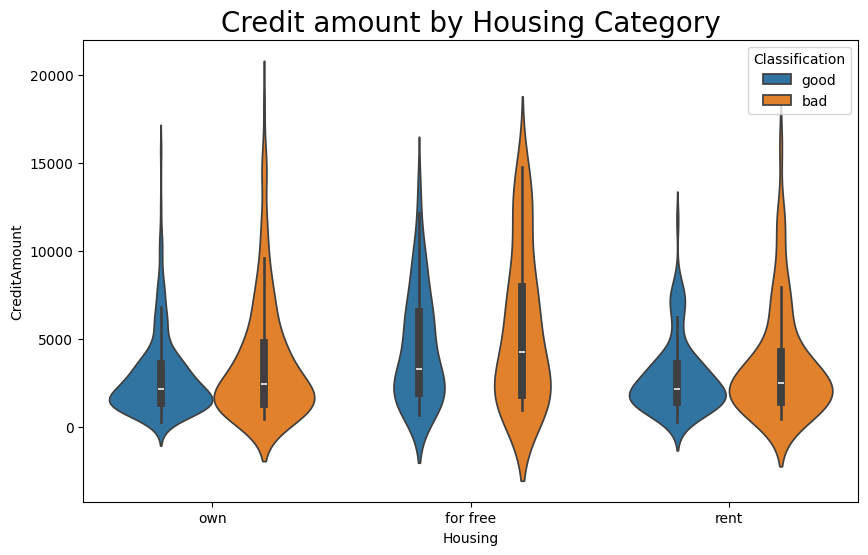

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values

house_category = ['rent','own','for free'] # createing categorial values
dataset['Housing'] = dataset['Housing'].replace([0,1,2], house_category) # replacing numerical with categorical values

plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset, x='Housing', y='CreditAmount', hue='Classification')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()

<ipython-input-32-fd3b40245b97>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels())
<ipython-input-32-fd3b40245b97>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels())


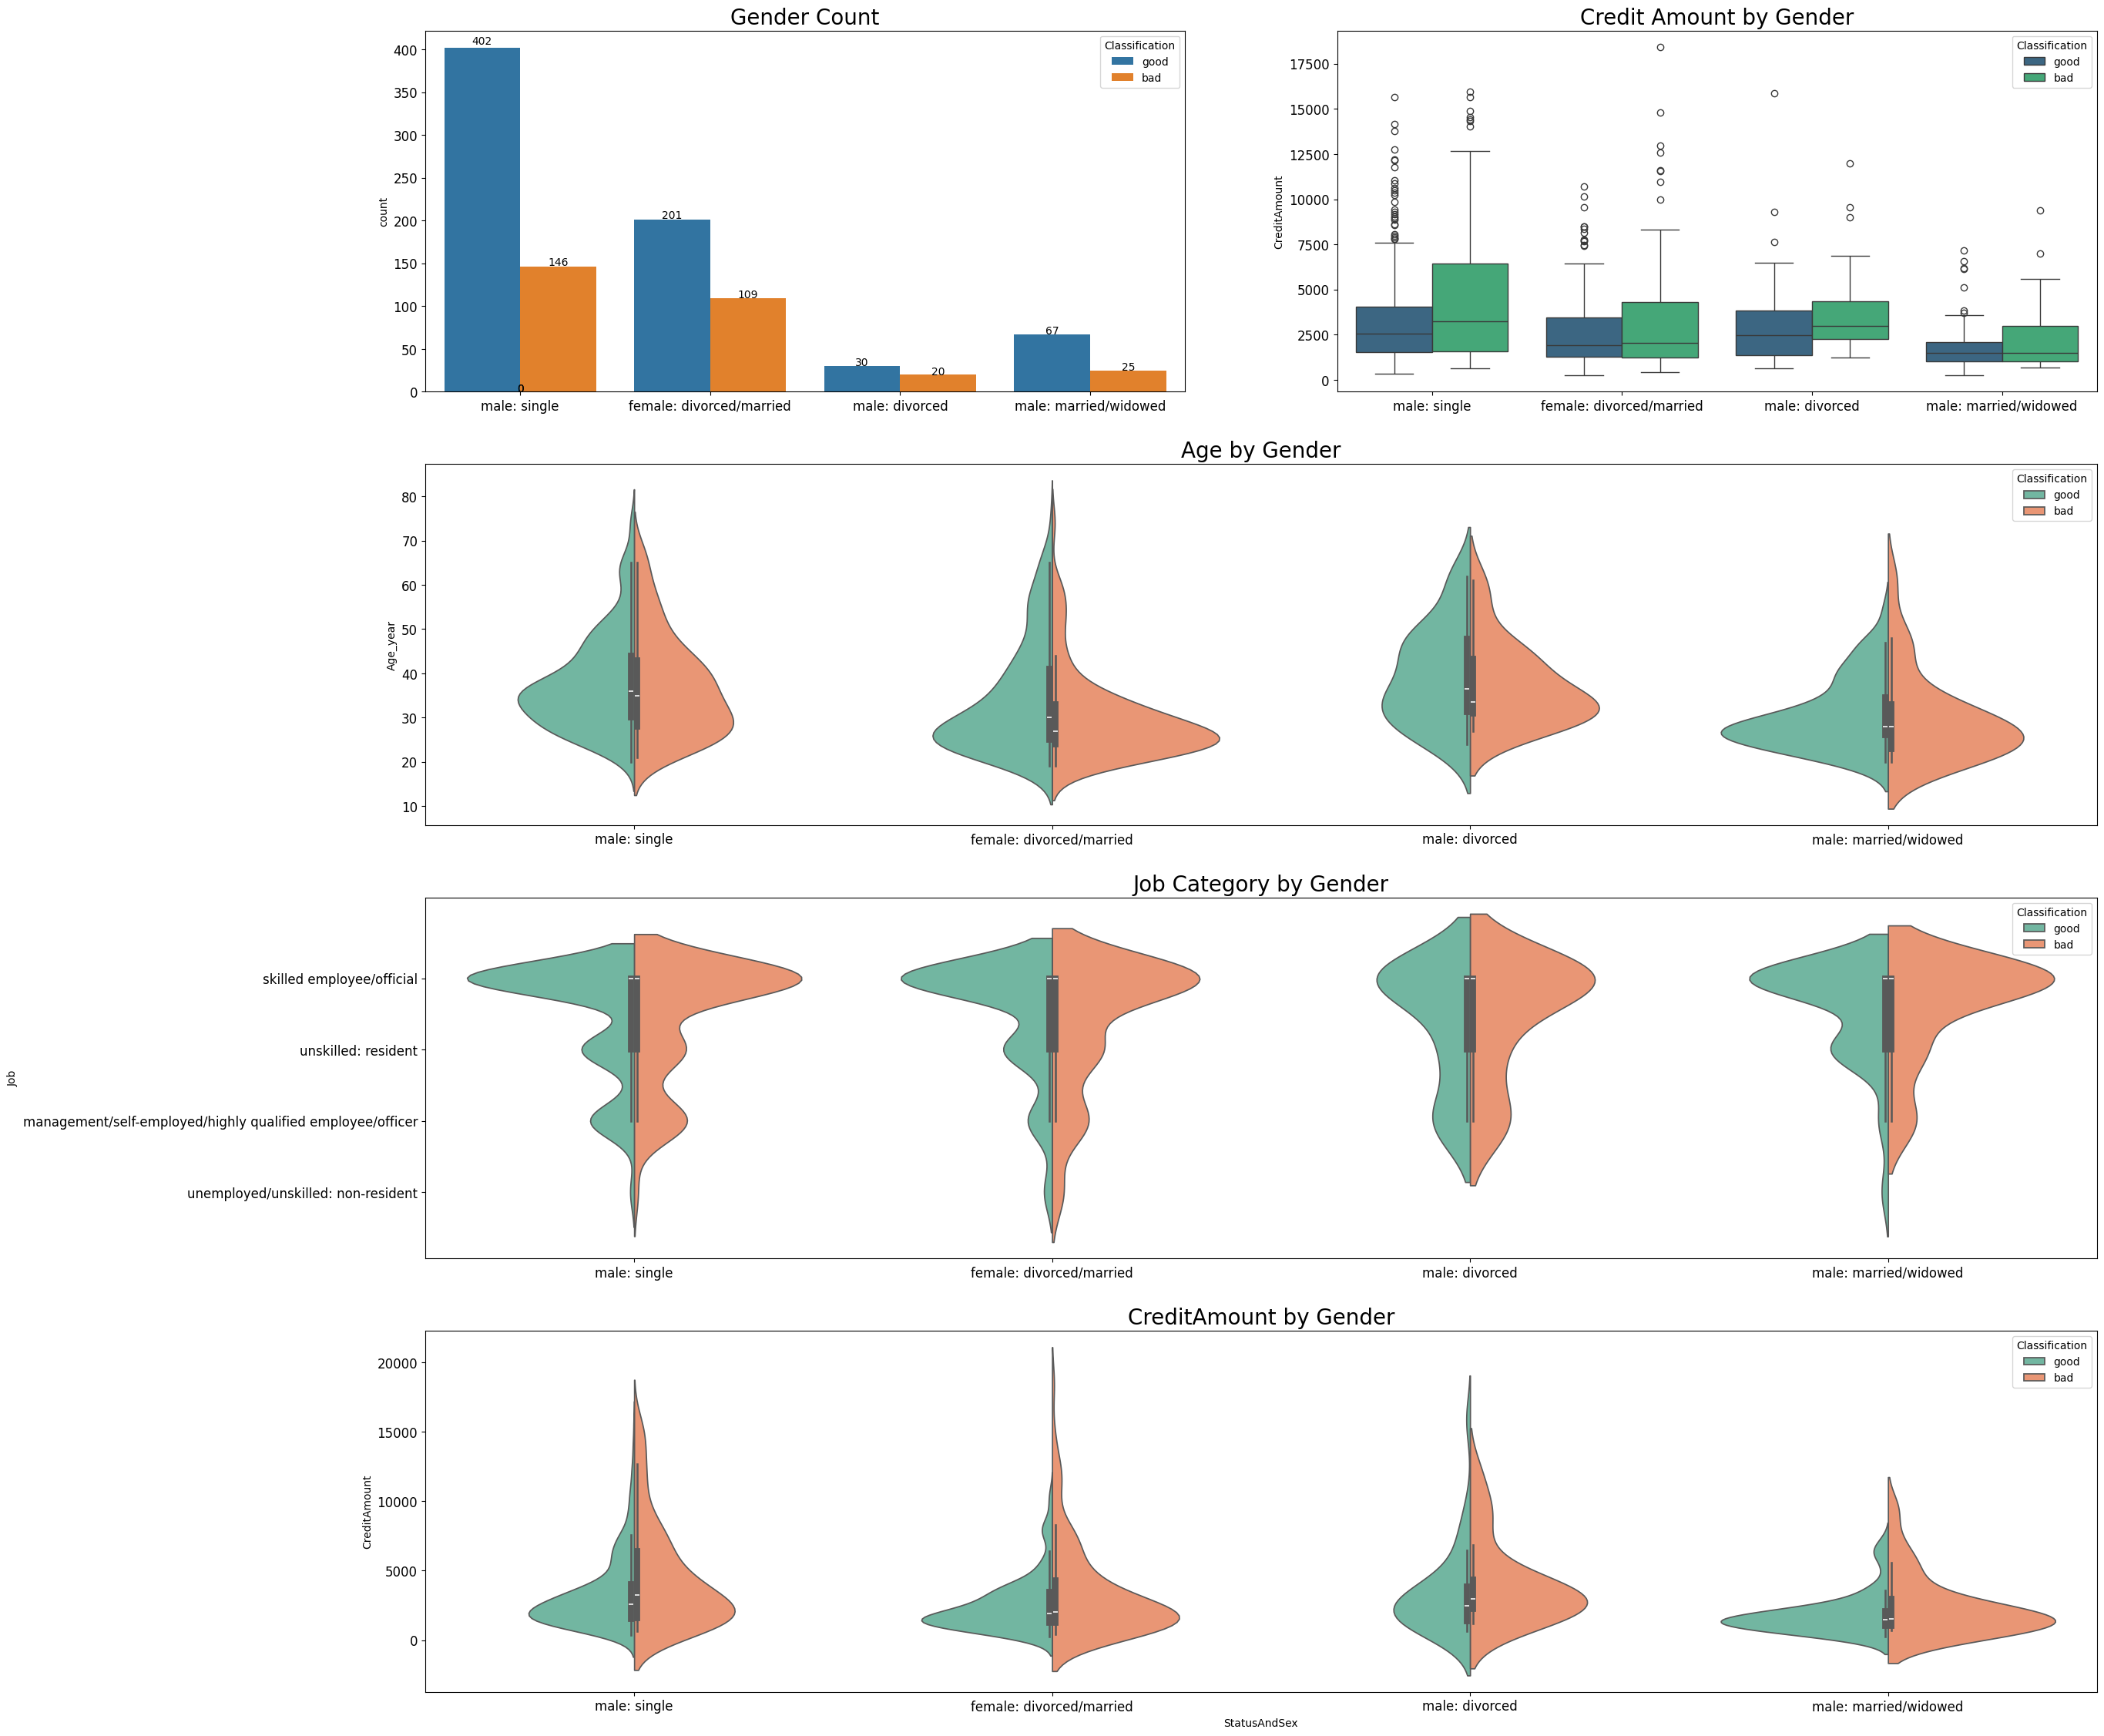

In [ ]:
class_category = ['bad','good'] # createing categorial values
dataset['Classification'] = dataset['Classification'].replace([0, 1], class_category) # replacing numerical with categorical values

sex_category = ['male: divorced','female: divorced/married','male: single', 'male: married/widowed'] # createing categorial values
dataset['StatusAndSex'] = dataset['StatusAndSex'].replace([0,1,2,3], sex_category) # replacing numerical with categorical values

plt.figure(figsize=(28, 28))

plt.subplot(421)
ax1 = sns.countplot(data=dataset, x='StatusAndSex', hue='Classification', palette='tab10')
show_values(ax1)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")
print('\n\n')

plt.subplot(422)
ax2 = sns.boxplot(data=dataset, x='StatusAndSex', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.set_title("Credit Amount by Gender", fontsize=20)
ax2.set_xlabel("")
print('\n\n')

plt.subplot(412)
ax3 = sns.violinplot(data=dataset, x='StatusAndSex', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_title("Age by Gender", fontsize=20)
ax3.set_xlabel("")

plt.subplot(413)
ax4 = sns.violinplot(data=dataset, x='StatusAndSex', y='Job', palette='Set2', hue='Classification', split=True)
ax4.set_title("Job Category by Gender", fontsize=20)
ax4.set_xlabel("")

plt.subplot(414)
ax5 = sns.violinplot(data=dataset, x='StatusAndSex', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax5.set_title("CreditAmount by Gender", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
ax5.tick_params(labelsize=12)

<ipython-input-34-22e9ffcdc718>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)


<ipython-input-34-22e9ffcdc718>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)


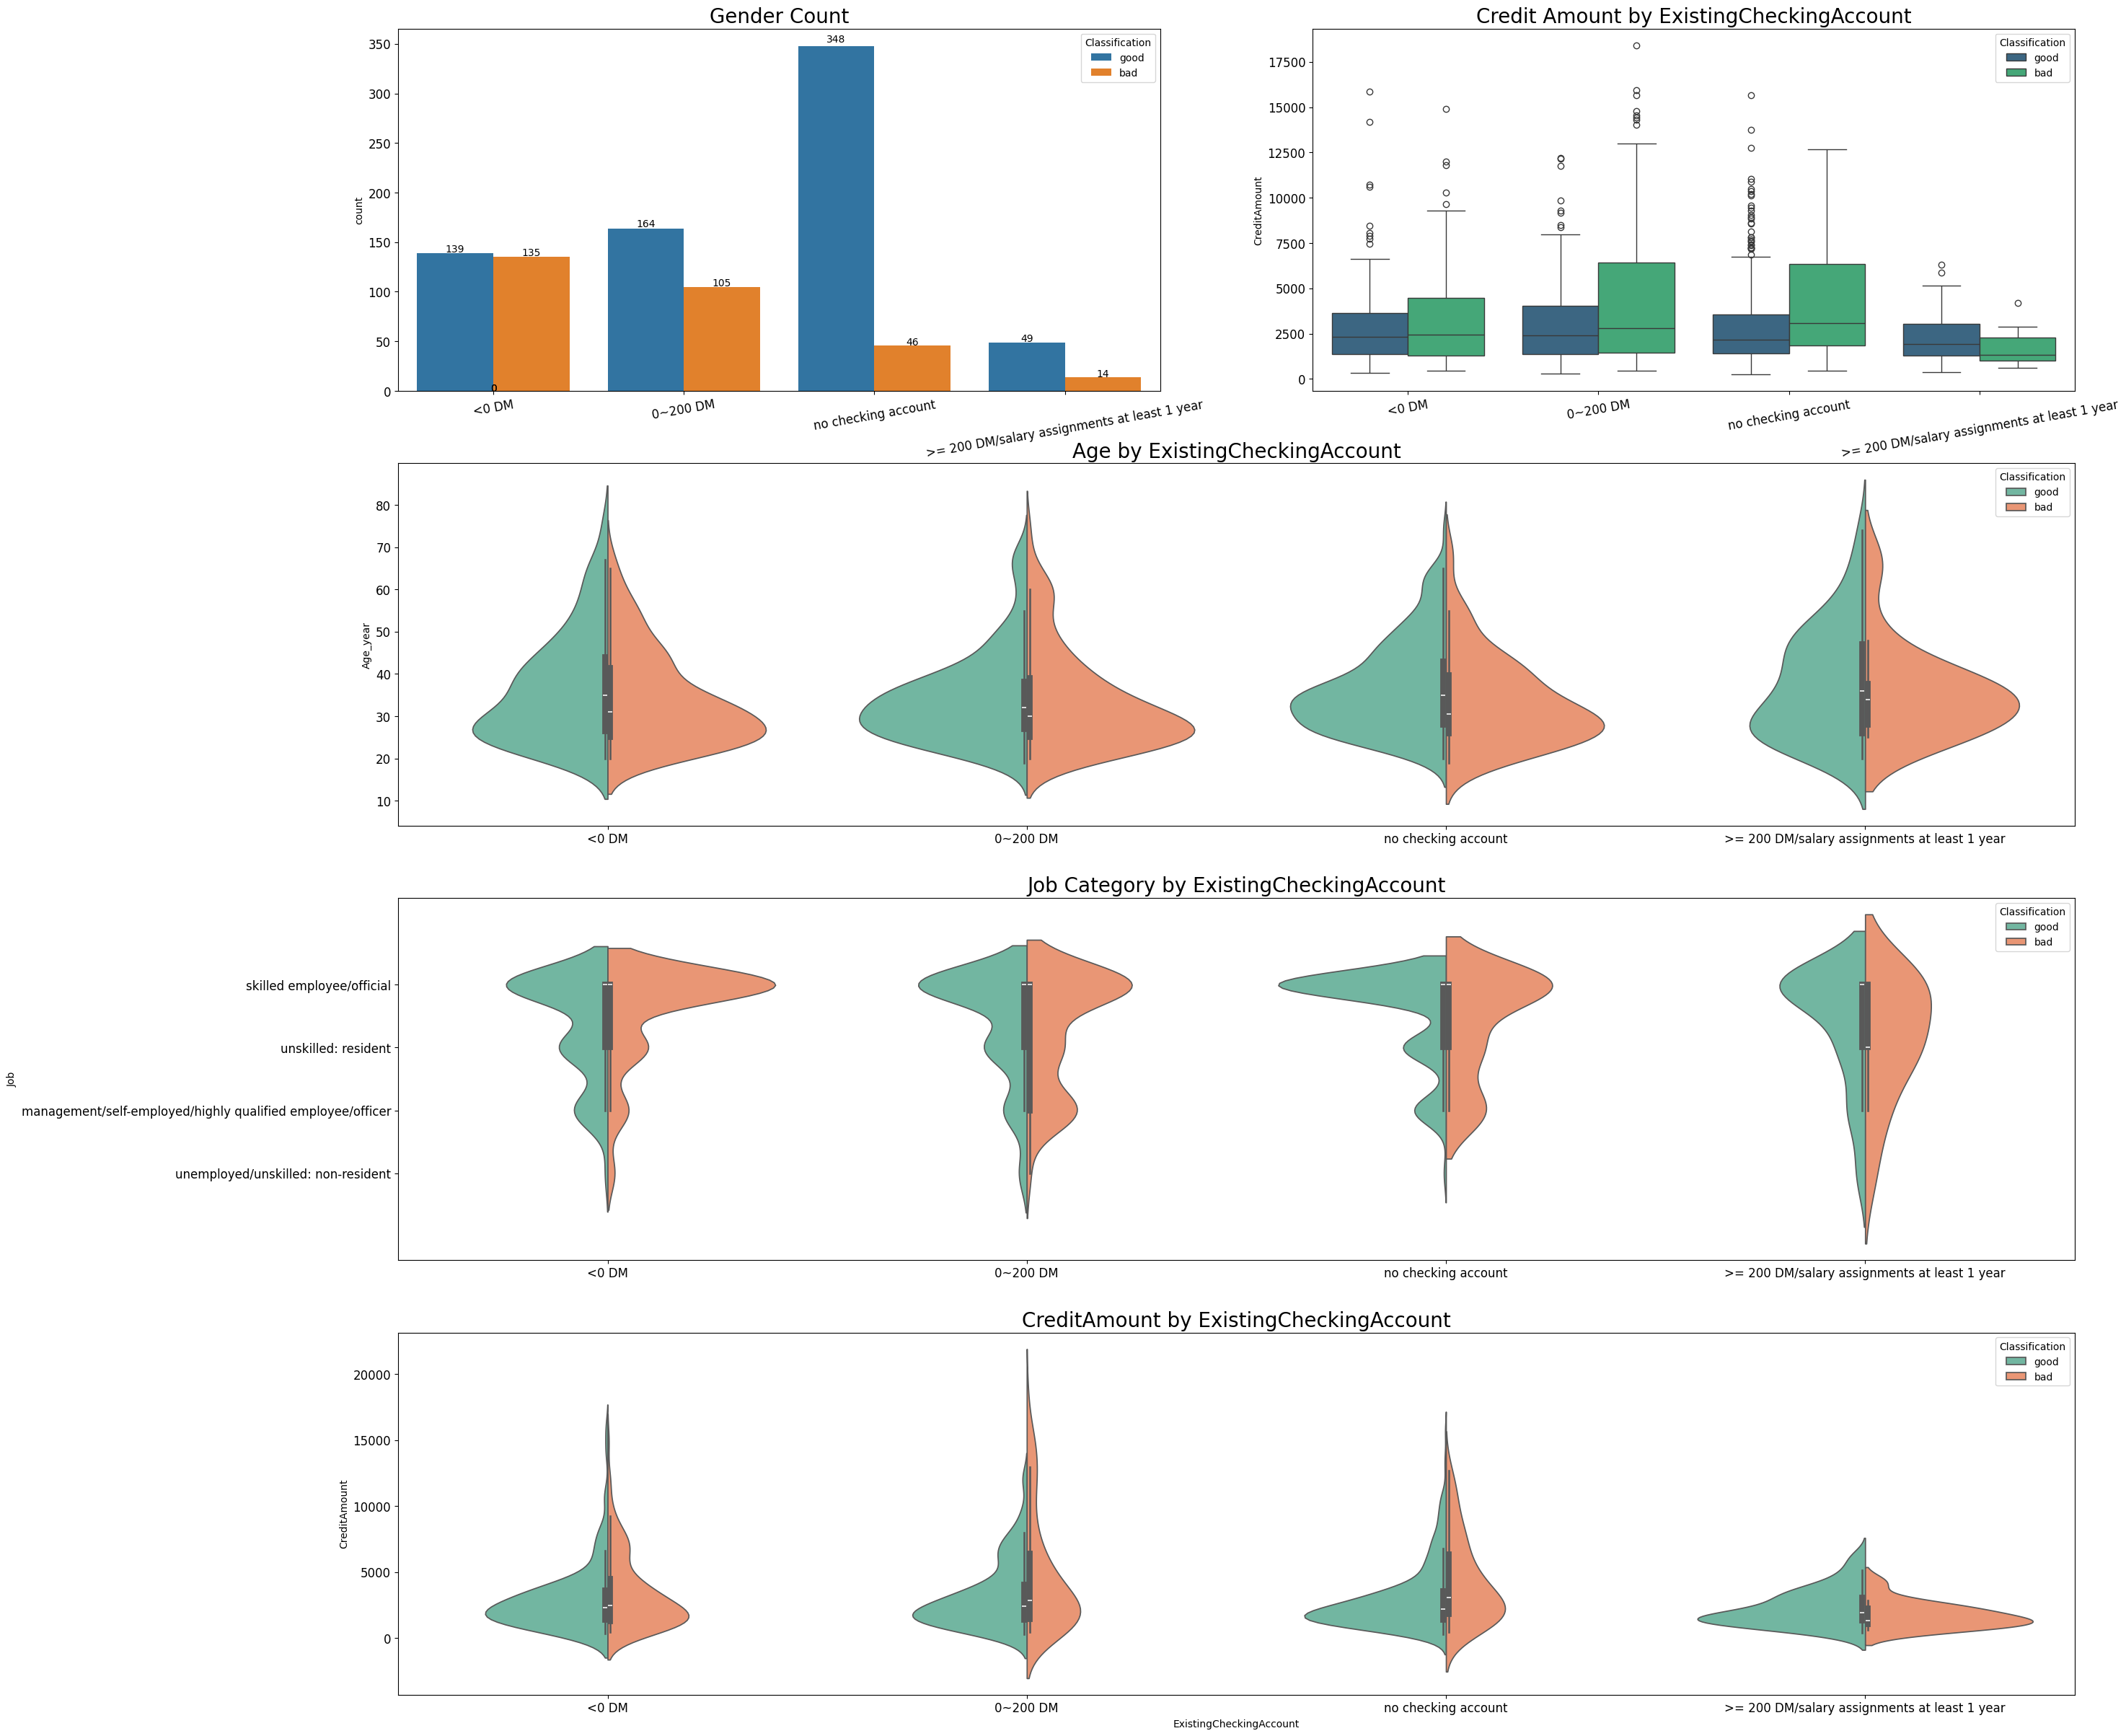

In [ ]:
check_category = ['<0 DM','0~200 DM','>= 200 DM/salary assignments at least 1 year', 'no checking account'] # createing categorial values
dataset['ExistingCheckingAccount'] = dataset['ExistingCheckingAccount'].replace([0,1,2,3], check_category) # replacing numerical with categorical values

plt.figure(figsize=(30, 30))

plt.subplot(421)
ax1 = sns.countplot(data=dataset, x='ExistingCheckingAccount', hue='Classification', palette='tab10')
show_values(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")
print('\n\n')

plt.subplot(422)
ax2 = sns.boxplot(data=dataset, x='ExistingCheckingAccount', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
ax2.set_title("Credit Amount by ExistingCheckingAccount", fontsize=20)
ax2.set_xlabel("")
print('\n\n')

plt.subplot(412)
ax3 = sns.violinplot(data=dataset, x='ExistingCheckingAccount', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_title("Age by ExistingCheckingAccount", fontsize=20)
ax3.set_xlabel("")

plt.subplot(413)
ax4 = sns.violinplot(data=dataset, x='ExistingCheckingAccount', y='Job', palette='Set2', hue='Classification', split=True)
ax4.set_title("Job Category by ExistingCheckingAccount", fontsize=20)
ax4.set_xlabel("")

plt.subplot(414)
ax5 = sns.violinplot(data=dataset, x='ExistingCheckingAccount', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax5.set_title("CreditAmount by ExistingCheckingAccount", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
ax5.tick_params(labelsize=12)

<ipython-input-35-20b353026dc3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30, fontsize=8)
<ipython-input-35-20b353026dc3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, fontsize=8)
<ipython-input-35-20b353026dc3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30, fontsize=8)
<ipython-input-35-20b353026dc3>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30, fontsize=8)


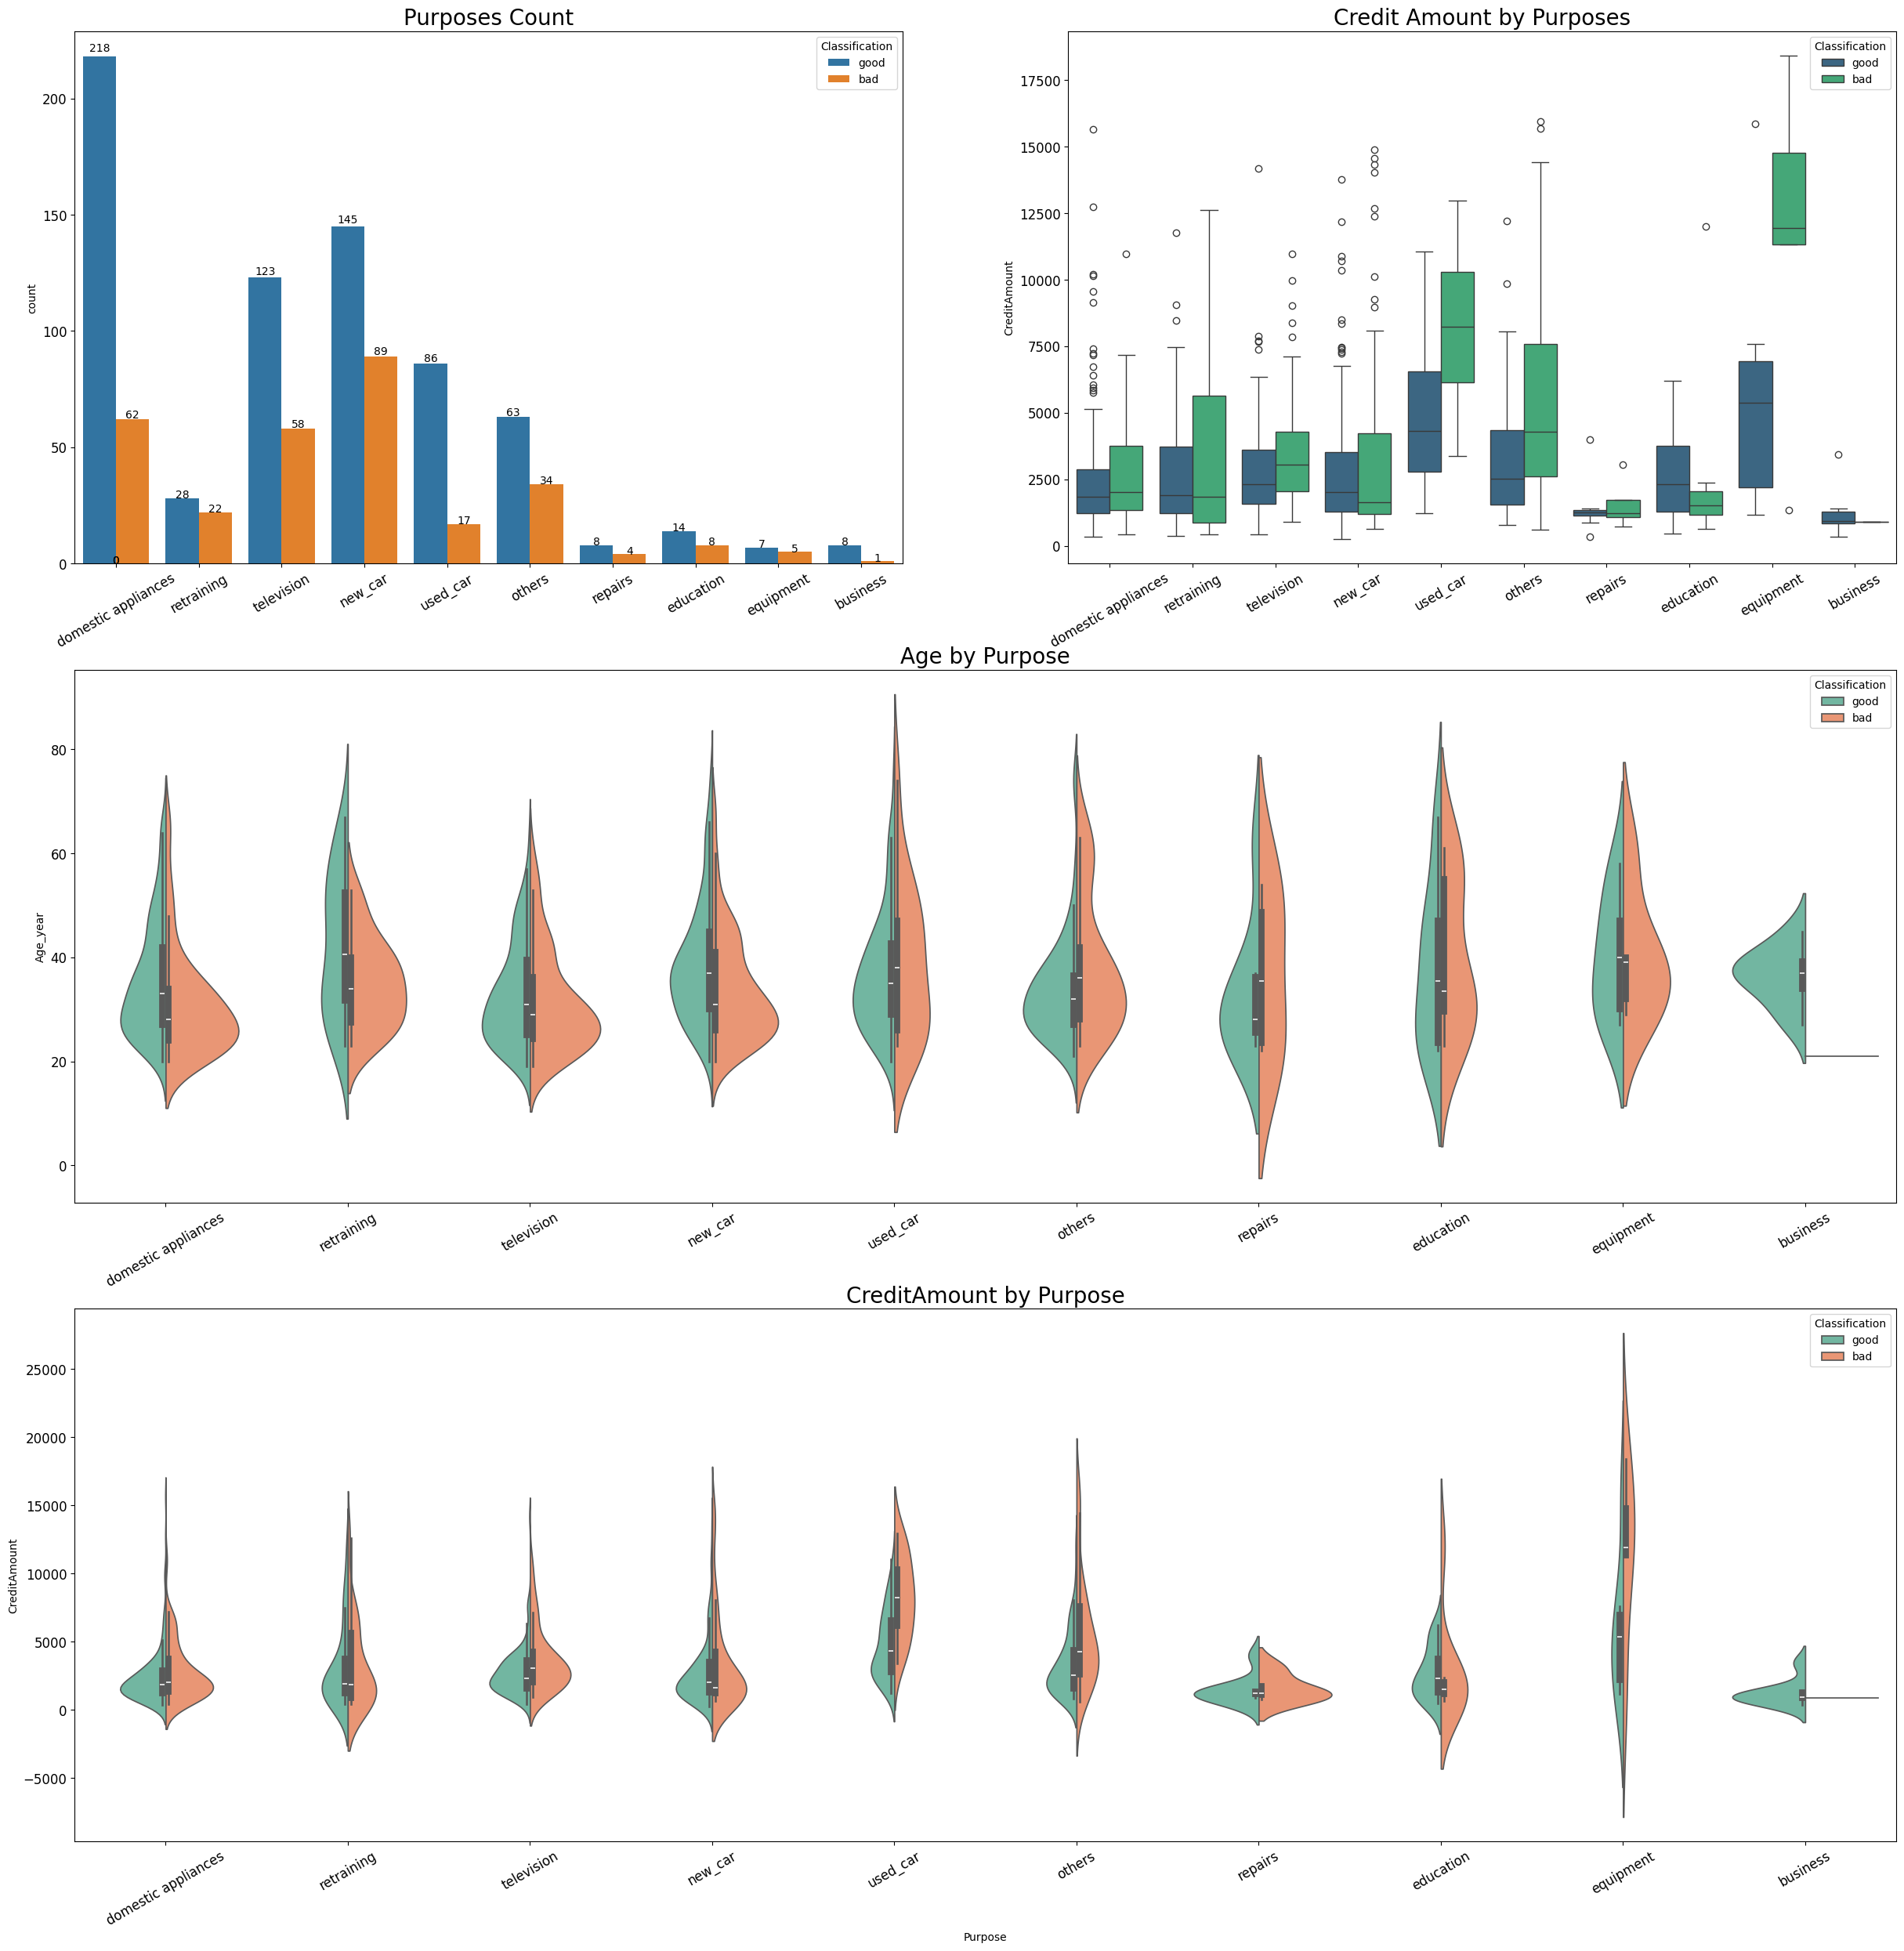

In [ ]:
check_category = ['new_car', 'used_car', 'equipment', 'television', 'domestic appliances', 'repairs',
                  'education', 'retraining', 'business', 'others'] # createing categorial values
dataset['Purpose'] = dataset['Purpose'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], check_category) # replacing numerical with categorical values

plt.figure(figsize = (30,30))

plt.subplot(321)
ax1 = sns.countplot(data=dataset, x="Purpose", palette="tab10", hue = "Classification")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30, fontsize=8)
show_values(ax1)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(322)
ax2 = sns.boxplot(data=dataset, x="Purpose", y="CreditAmount", palette="viridis", hue = "Classification")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, fontsize=8)
ax2.set_title("Credit Amount by Purposes", fontsize=20)
ax2.set_xlabel("")

plt.subplot(312)
ax3 = sns.violinplot(data=dataset, x="Purpose", y="Age_year", palette="Set2", hue = "Classification",split=True)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30, fontsize=8)
ax3.set_title("Age by Purpose", fontsize=20)
ax3.set_xlabel("Purposes")
ax3.set_xlabel("")

plt.subplot(313)
ax4 = sns.violinplot(data=dataset, x='Purpose', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30, fontsize=8)
ax4.set_title("CreditAmount by Purpose", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)

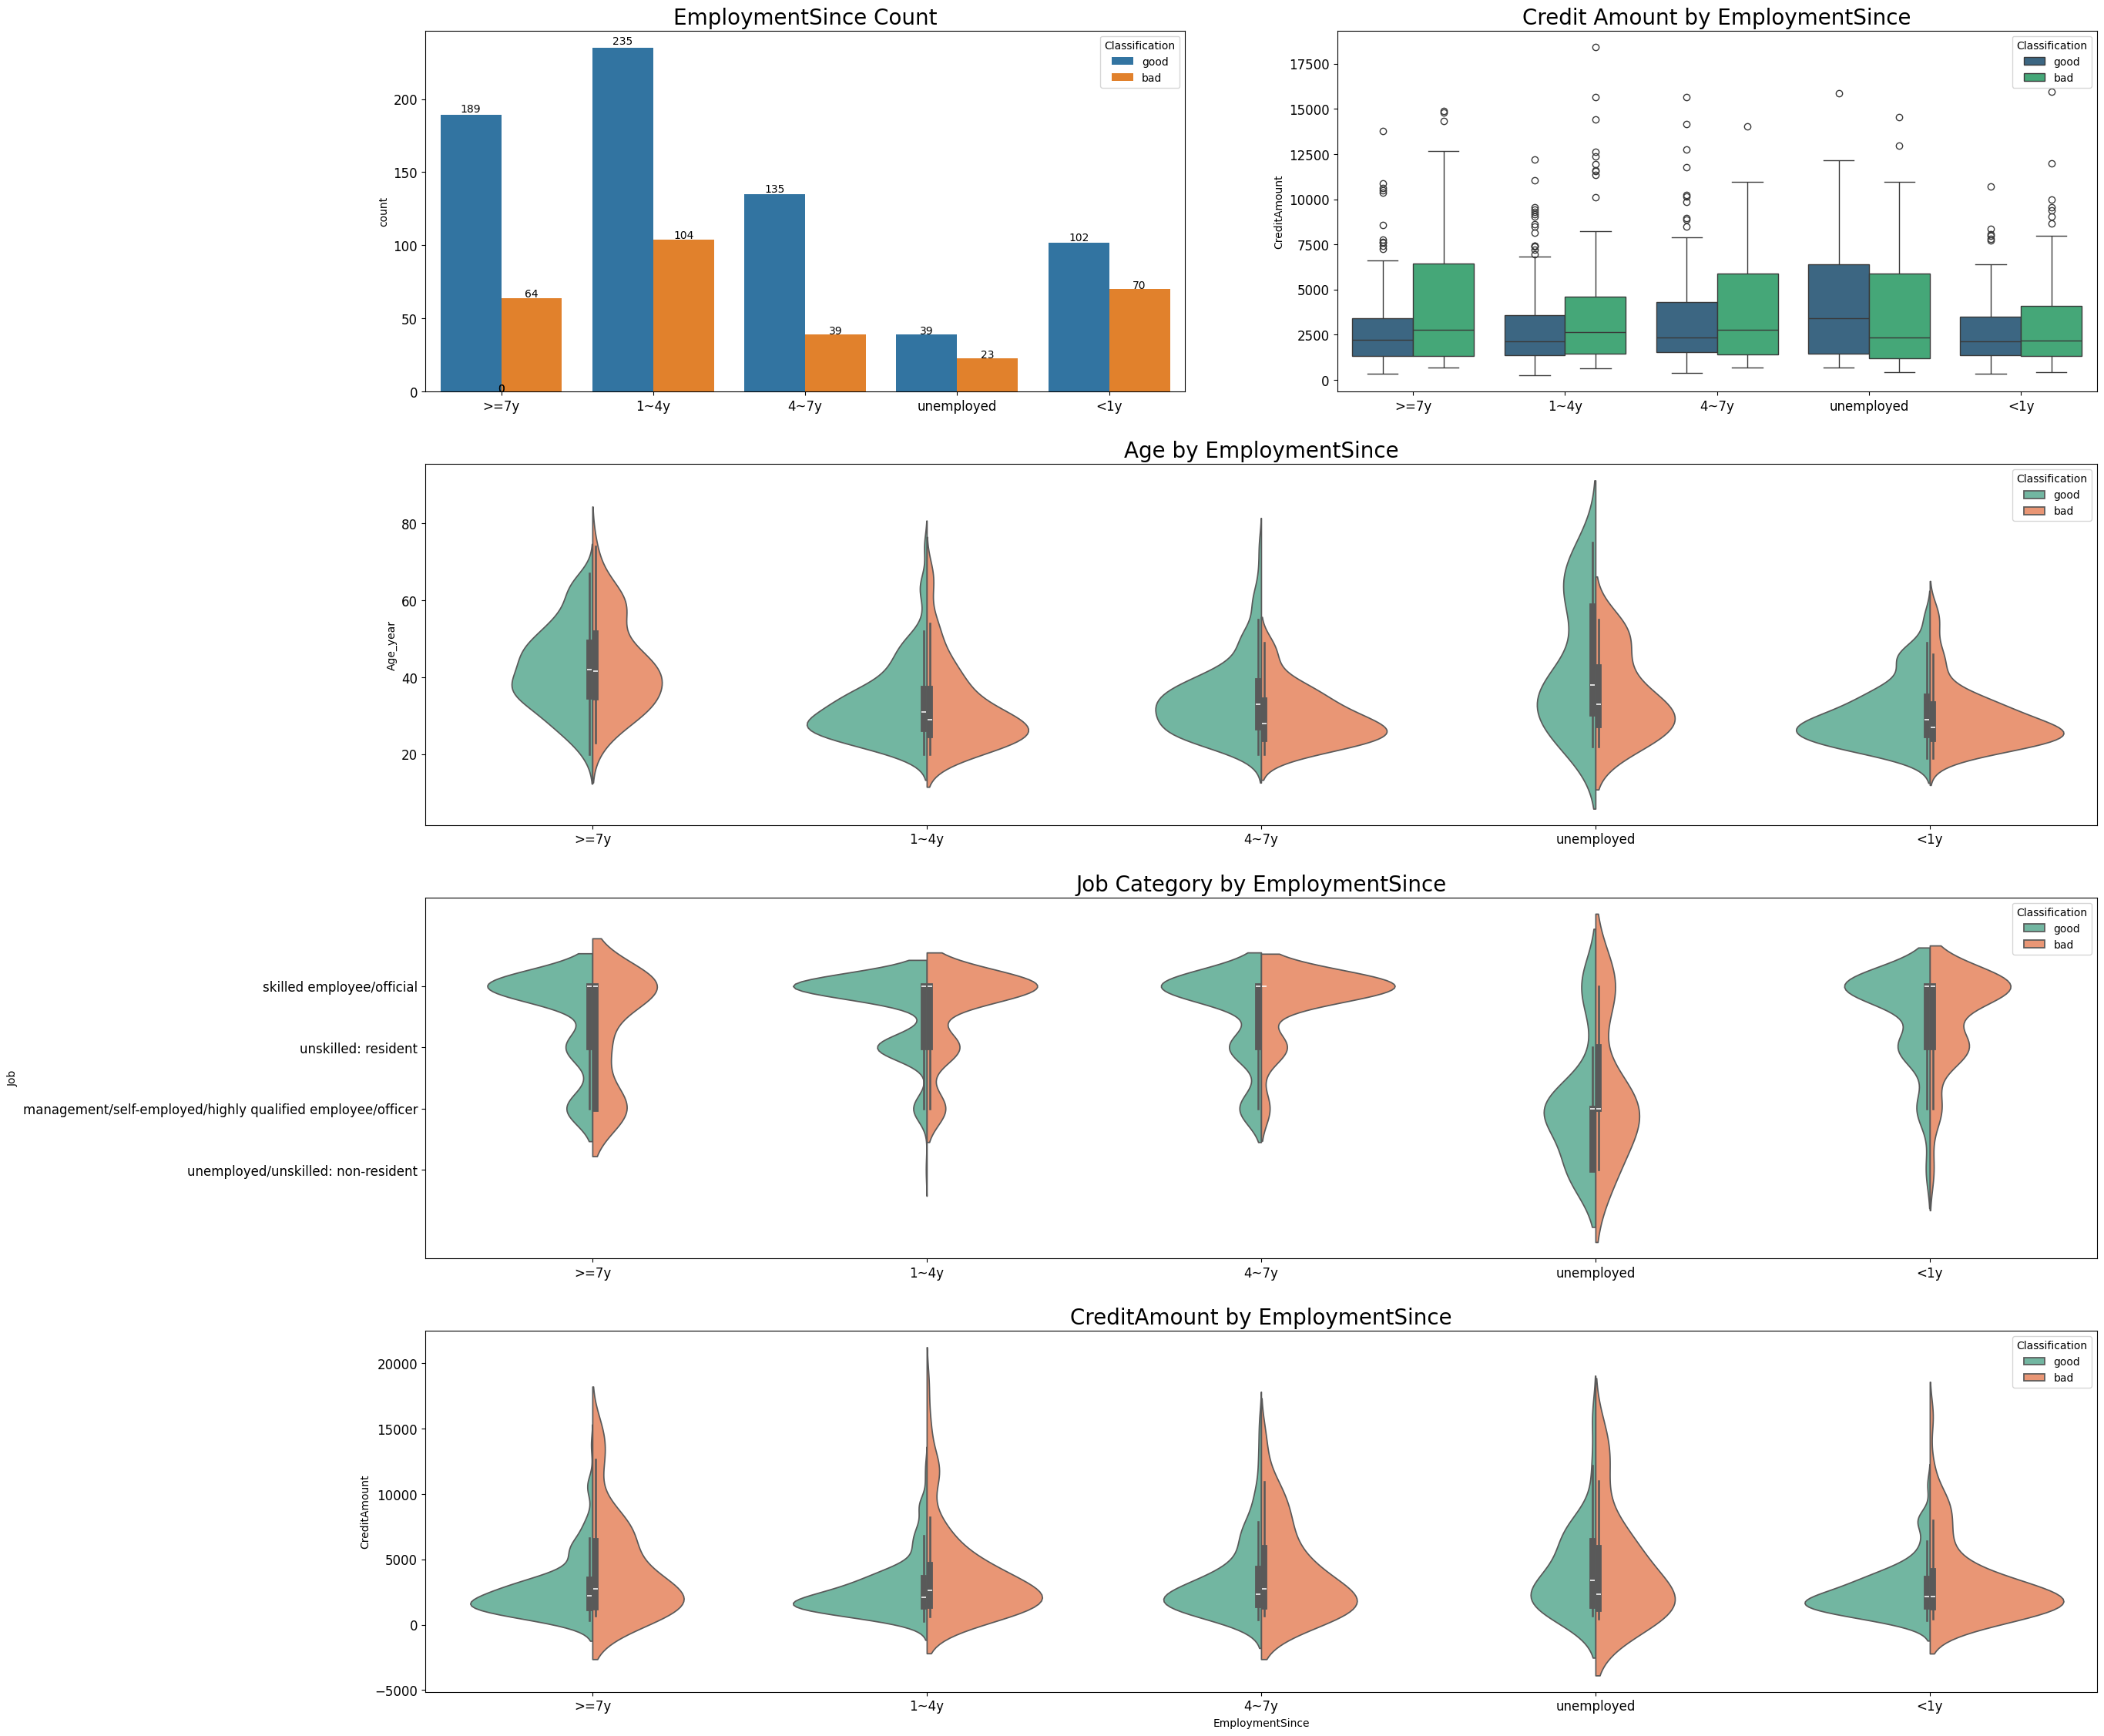

In [ ]:
check_category = ['unemployed','<1y','1~4y', '4~7y', '>=7y'] # createing categorial values
dataset['EmploymentSince'] = dataset['EmploymentSince'].replace([0, 1, 2, 3, 4], check_category) # replacing numerical with categorical values

plt.figure(figsize=(28, 28))

plt.subplot(421)
ax1 = sns.countplot(data=dataset, x='EmploymentSince', palette='tab10', hue='Classification')
ax1.set_title("EmploymentSince Count", fontsize=20)
show_values(ax1)
ax1.set_xlabel("")

plt.subplot(422)
ax2 = sns.boxplot(data=dataset, x='EmploymentSince', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_title("Credit Amount by EmploymentSince", fontsize=20)
ax2.set_xlabel("")

plt.subplot(412)
ax3 = sns.violinplot(data=dataset, x='EmploymentSince', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_title("Age by EmploymentSince", fontsize=20)
ax3.set_xlabel("")

plt.subplot(413)
ax4 = sns.violinplot(data=dataset, x='EmploymentSince', y='Job', palette='Set2', hue='Classification', split=True)
ax4.set_title("Job Category by EmploymentSince", fontsize=20)
ax4.set_xlabel("")

plt.subplot(414)
ax5 = sns.violinplot(data=dataset, x='EmploymentSince', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax5.set_title("CreditAmount by EmploymentSince", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
ax5.tick_params(labelsize=12)

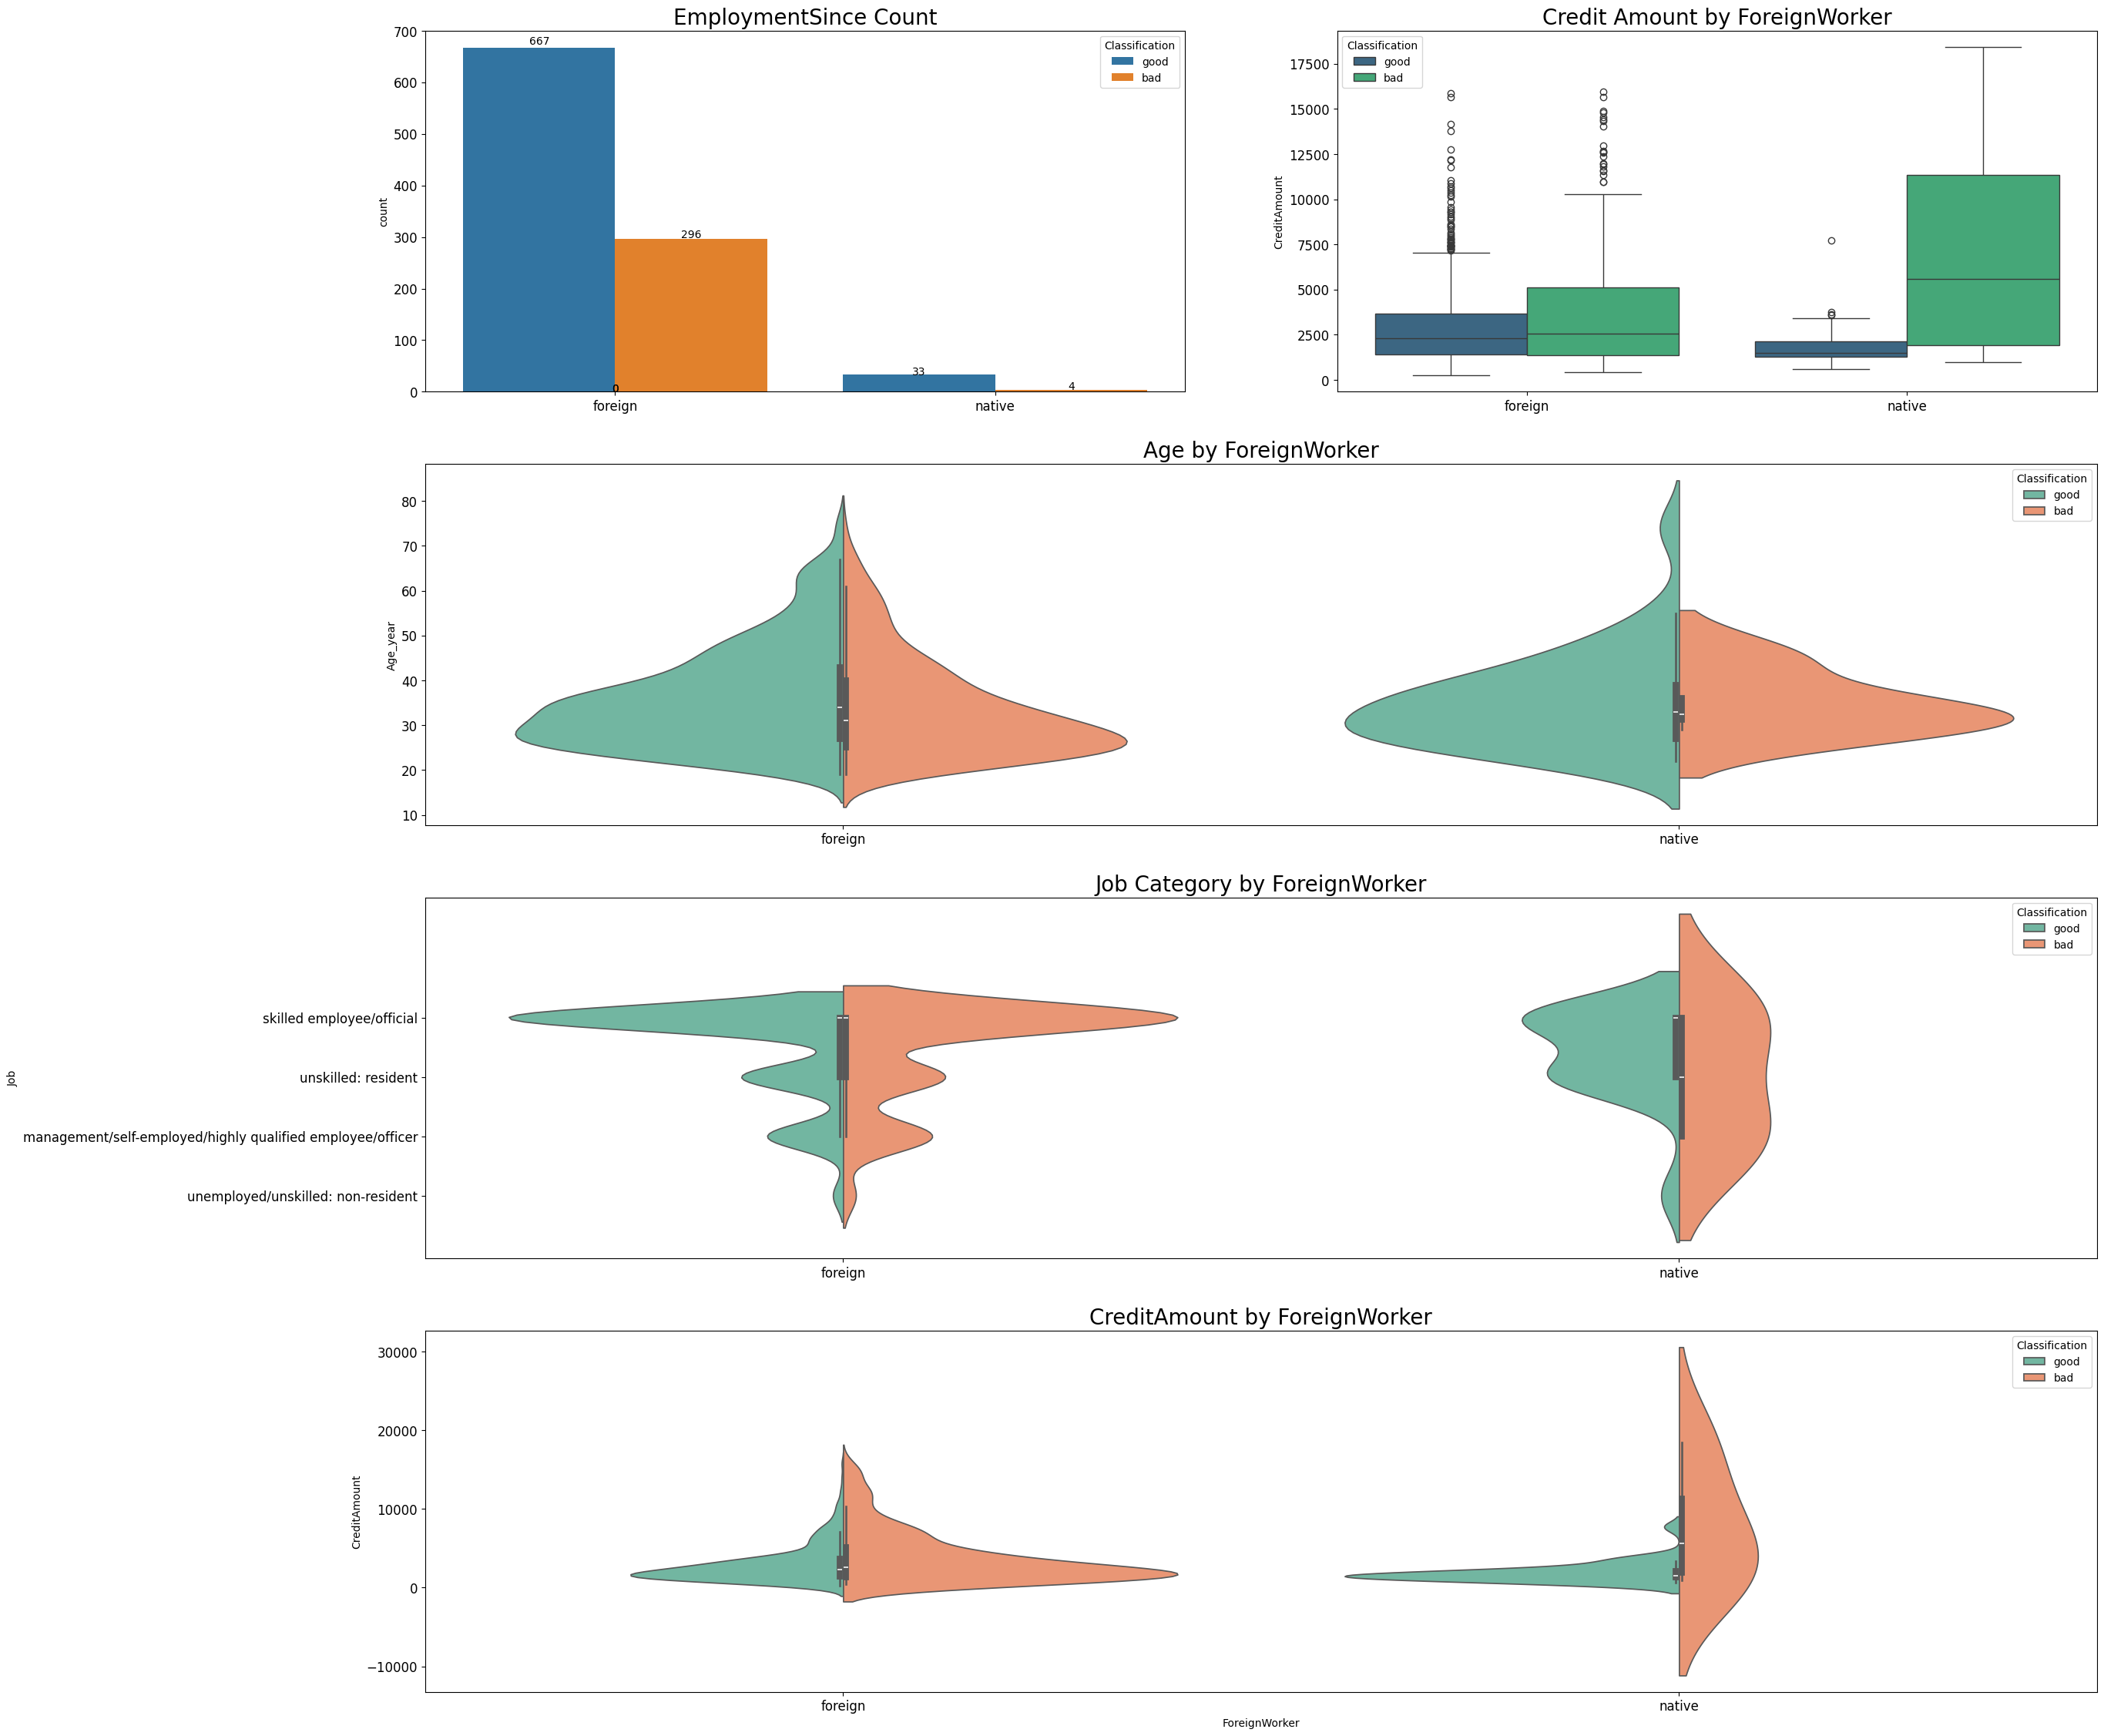

In [ ]:
check_category = ['foreign','native'] # createing categorial values
dataset['ForeignWorker'] = dataset['ForeignWorker'].replace([0, 1], check_category) # replacing numerical with categorical values

plt.figure(figsize=(28, 28))

plt.subplot(421)
ax1 = sns.countplot(data=dataset, x='ForeignWorker', palette='tab10', hue='Classification')
ax1.set_title("EmploymentSince Count", fontsize=20)
show_values(ax1)
ax1.set_xlabel("")

plt.subplot(422)
ax2 = sns.boxplot(data=dataset, x='ForeignWorker', y='CreditAmount', palette='viridis', hue='Classification')
ax2.set_title("Credit Amount by ForeignWorker", fontsize=20)
ax2.set_xlabel("")

plt.subplot(412)
ax3 = sns.violinplot(data=dataset, x='ForeignWorker', y='Age_year', palette='Set2', hue='Classification', split=True)
ax3.set_title("Age by ForeignWorker", fontsize=20)
ax3.set_xlabel("")

plt.subplot(413)
ax4 = sns.violinplot(data=dataset, x='ForeignWorker', y='Job', palette='Set2', hue='Classification', split=True)
ax4.set_title("Job Category by ForeignWorker", fontsize=20)
ax4.set_xlabel("")

plt.subplot(414)
ax5 = sns.violinplot(data=dataset, x='ForeignWorker', y='CreditAmount', palette='Set2', hue='Classification', split=True)
ax5.set_title("CreditAmount by ForeignWorker", fontsize=20)

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
ax5.tick_params(labelsize=12)

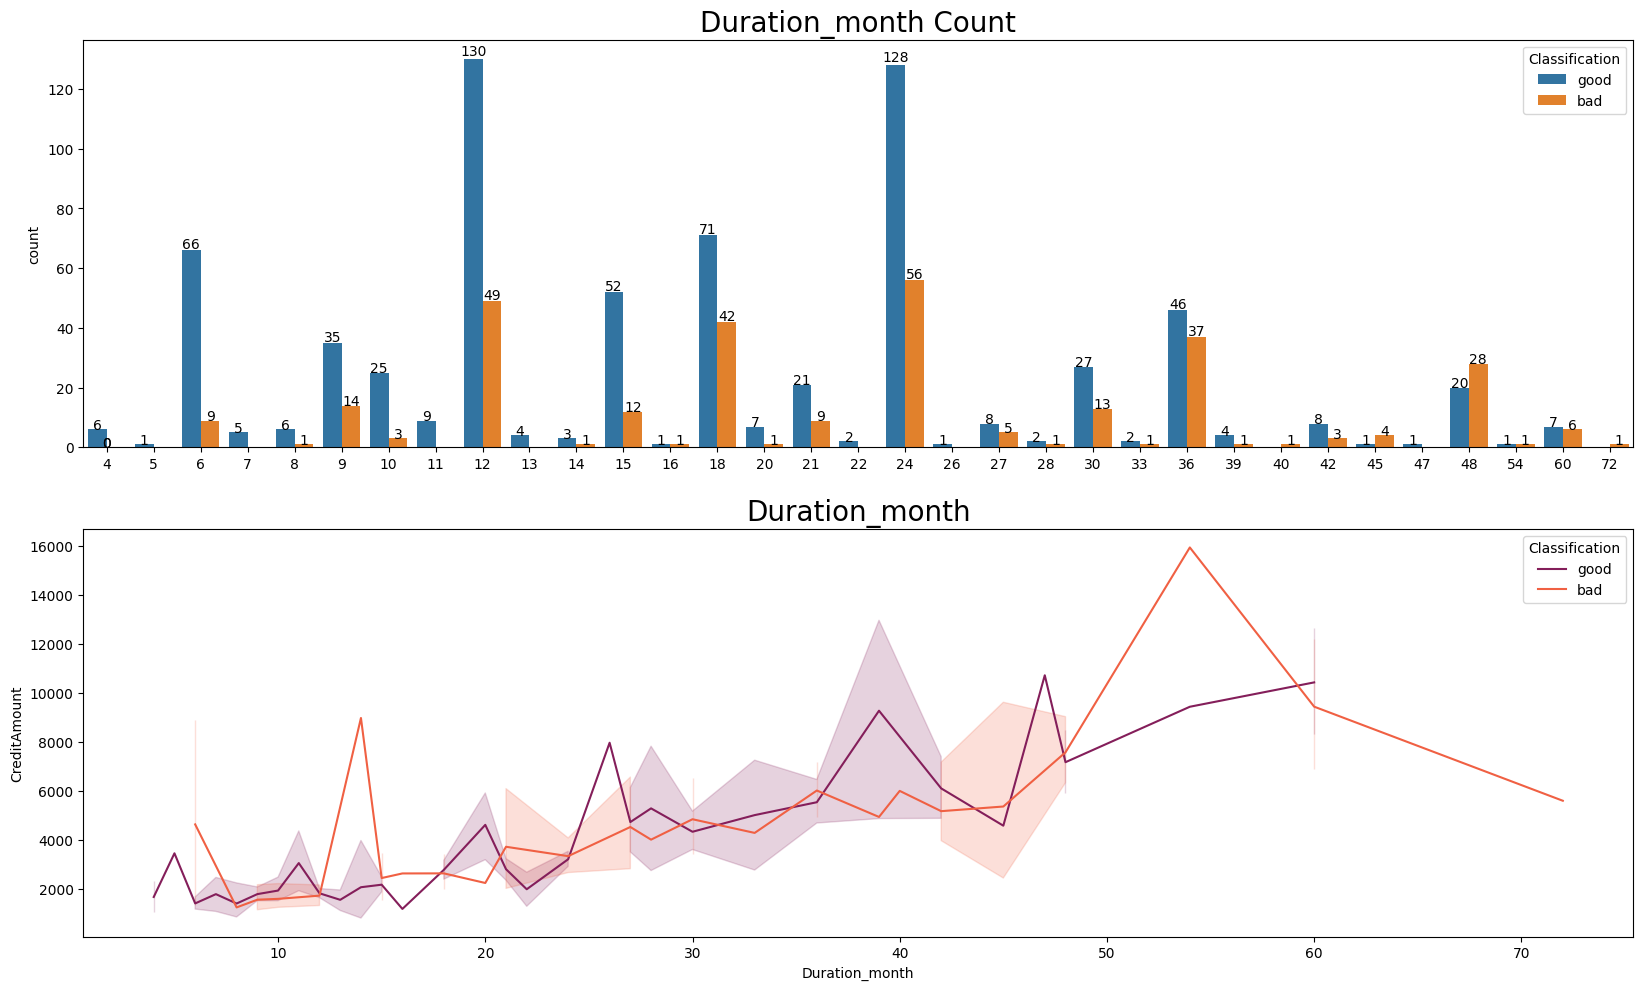

In [ ]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
plt.figure(figsize=(20, 18))

plt.subplot(311)
ax1 = sns.countplot(data=dataset, x='Duration_month', hue='Classification', palette='tab10')
ax1.set_title("Duration_month Count", fontsize=20)
show_values(ax1)
ax1.set_xlabel("")

plt.subplot(312)
ax2 = sns.lineplot(data=dataset, x='Duration_month', y='CreditAmount', hue='Classification', palette='rocket')
ax2.set_title("Duration_month", fontsize=20)

#sns.pointplot(data=dataset, x='Duration_month', y='CreditAmount', hue='Classification', palette='rocket', ax=ax3)
#fig.tight_layout()
plt.show()